# Pre Processing

In [61]:
import numpy as np
import pandas as pd
import librosa
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
data = np.load('RavdessAudioOnlyNumpy__X_train.npy')

# Load the CSV file containing the labels
labels_df = pd.read_csv('RavdessAudioOnlyNumpy__Y_train.csv')
labels_df.drop("filename", axis=1, inplace=True)

# Extract the labels
labels = labels_df.values  # Replace 'label_column_name' with the actual column name in your CSV file

# Verify the extracted labels
print(labels)

# Step 2: Load the test dataset
X_test = np.load('RavdessAudioOnlyNumpy__X_test.npy')
y_test_df = pd.read_csv('RavdessAudioOnlyNumpy__Y_test.csv')
y_test_df.drop("filename", axis=1, inplace=True)

y_test = y_test_df.values

[['audio-only' 'speech' 'neutral' ... '1st' 1 'M']
 ['audio-only' 'speech' 'neutral' ... '2nd' 1 'M']
 ['audio-only' 'speech' 'neutral' ... '1st' 1 'M']
 ...
 ['audio-only' 'speech' 'surprised' ... '2nd' 18 'F']
 ['audio-only' 'speech' 'surprised' ... '1st' 18 'F']
 ['audio-only' 'speech' 'surprised' ... '2nd' 18 'F']]


In [62]:
type(data)

numpy.ndarray

In [63]:
scaled_features_2d_Train

array([[0.        , 0.46900077, 0.45195416, ..., 0.44953032, 0.44953032,
        0.44953032],
       [0.        , 0.46249689, 0.44398847, ..., 0.44215345, 0.44215345,
        0.44215345],
       [0.        , 0.47619296, 0.45874598, ..., 0.45601387, 0.45601387,
        0.45601387],
       ...,
       [0.        , 0.41661125, 0.400213  , ..., 0.40083286, 0.40083286,
        0.40083286],
       [0.        , 0.38375256, 0.36913106, ..., 0.36872759, 0.36872759,
        0.36872759],
       [0.        , 0.42207913, 0.4052245 , ..., 0.40658692, 0.40658692,
        0.40658692]])

In [64]:
type(scaled_features_2d_Train)

numpy.ndarray

In [65]:
data.shape

(1828, 304304)

In [66]:
len(data[1]==0)

304304

In [24]:
labels.shape

(1828, 8)

# Feature Extraction

In [5]:
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder
from tslearn.preprocessing import TimeSeriesScalerMinMax

def extract_audio_features(data, labels, features_file, labels_file):
    # Step 3: Extract audio features
    def extract_features(audio, sr):
        # Extract MFCC features
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

        # Extract chroma features
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)

        # Extract spectral contrast features
        contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)

        # Extract tonnetz features
        tonnetz = librosa.feature.tonnetz(y=audio, sr=sr)

        # Extract zero-crossing rate
        zero_crossing = librosa.feature.zero_crossing_rate(y=audio)

        # Extract pitch features
        pitch, _ = librosa.piptrack(y=audio, sr=sr)

        return mfcc, chroma, contrast, tonnetz, zero_crossing, pitch

    # Step 4: Statistical features
    def compute_statistics(features):
        mean_features = np.mean(features, axis=1)
        std_features = np.std(features, axis=1)
        median_features = np.median(features, axis=1)

        return mean_features, std_features, median_features

    # Step 8: Feature scaling and normalization
    def scale_features(features):
        scaler = TimeSeriesScalerMinMax()
        scaled_features = scaler.fit_transform(features)
        return scaled_features

    # Step 9: Label encoding
    def encode_labels(labels):
        flattened_labels = labels.ravel()  # Flatten the labels array
        flattened_labels = flattened_labels.astype(str)  # Convert labels to strings

        encoder = LabelEncoder()
        encoded_labels = encoder.fit_transform(flattened_labels)

        return encoded_labels


    # Step 10: Store the extracted features
    def store_features(features, labels, features_file, labels_file):
        np.save(features_file, features)
        np.save(labels_file, labels)

    # Iterate over the dataset
    all_features = []
    for audio, label in zip(data, labels):
        # Step 2: Preprocess the audio data (if necessary)

        # Step 3: Set the sample rate value
        sr = 22050

        # Step 3: Extract audio features
        mfcc, chroma, contrast, tonnetz, zero_crossing, pitch = extract_features(audio, sr)

        # Step 4: Statistical features
        mfcc_stats = compute_statistics(mfcc)
        chroma_stats = compute_statistics(chroma)
        contrast_stats = compute_statistics(contrast)
        tonnetz_stats = compute_statistics(tonnetz)
        zero_crossing_stats = compute_statistics(zero_crossing)
        pitch_stats = compute_statistics(pitch)

        # Combine all features
        features = np.concatenate((mfcc_stats[0], chroma_stats[0][:12], contrast_stats[0], tonnetz_stats[0],
                                   zero_crossing_stats[0], pitch_stats[0]), axis=0)

        statistics = np.concatenate((mfcc_stats[1], chroma_stats[1], contrast_stats[1], tonnetz_stats[1],
                                 zero_crossing_stats[1], pitch_stats[1]), axis=0)

        # Combine features and statistics
        all_features.append(np.concatenate((features, statistics), axis=0))

    # Convert the list of features into a numpy array
    all_features = np.array(all_features)

    # Step 8: Feature scaling and normalization
    scaled_features = scale_features(all_features)

    # Step 9: Label encoding
    encoded_labels = encode_labels(labels)

    # Step 10: Store the extracted features
    store_features(scaled_features, encoded_labels, features_file, labels_file)

    # # Step 11: Save the features as a file
    # np.save('all_features.npy', scaled_features)
    # np.save('encoded_labels.npy', encoded_labels)

    return scaled_features, encoded_labels

In [16]:
# scaled_features_Train, encoded_labels_Train = extract_audio_features(data, labels, "all_features_Train.npy", 'encoded_labels_Train.npy') 

In [67]:
# Load the scaled features
scaled_features_Train = np.load('all_features_Train.npy')

# Load the encoded labels
encoded_labels_Train = np.load('encoded_labels_Train.npy')


In [6]:
scaled_features_Test, encoded_labels_Test = extract_audio_features(X_test, y_test, "all_features_Test.npy", 'encoded_labels_Test.npy') 

NameError: name 'extract_audio_features' is not defined

In [68]:
# Load the scaled features
scaled_features_Test = np.load('all_features_Test.npy')

# Load the encoded labels
encoded_labels_Test = np.load('encoded_labels_Test.npy')


In [69]:
# Reshape the scaled_features array
scaled_features_2d_Train = scaled_features_Train.reshape(scaled_features_Train.shape[0], -1)

In [70]:
# Reshape the scaled_features_Test array
scaled_features_2d_Test = scaled_features_Test.reshape(scaled_features_Test.shape[0], -1)

# Feature Based Clustering

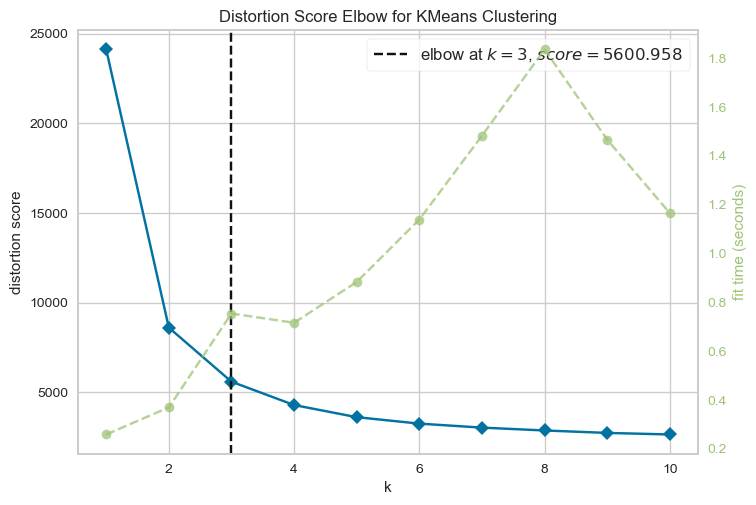

Elbow point based on the sum of squared distances: 3


In [71]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Step 4: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 11)  # Set the range of cluster numbers to try
elbow_scores = []  # To store the sum of squared distances (inertia) for each cluster number

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features_2d_Train)
    
    # Elbow method: Compute the sum of squared distances
    elbow_scores.append(kmeans.inertia_)

# Step 5: Plot the elbow method results
elb_visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1, 11))
elb_visualizer.fit(scaled_features_2d_Train)
elb_visualizer.show()

# Step 6: Find the elbow point
elbow_point = elb_visualizer.elbow_value_

print("Elbow point based on the sum of squared distances:", elbow_point)


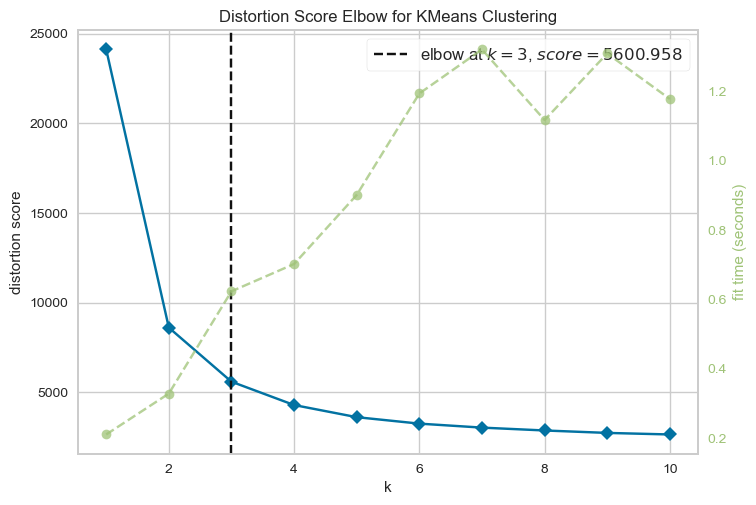

Elbow point based on the sum of squared distances: 3
Best value of k based on silhouette score: 2
Silhouette score for the best value of k: 0.5184363010751892


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Step 4: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 11)  # Set the range of cluster numbers to try
elbow_scores = []  # To store the sum of squared distances (inertia) for each cluster number
silhouette_scores = []  # To store the silhouette scores for each cluster number

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features_2d_Train)
    
    # Elbow method: Compute the sum of squared distances
    elbow_scores.append(kmeans.inertia_)
    
    # Silhouette score: Compute the average silhouette score
    silhouette = silhouette_score(scaled_features_2d_Train, kmeans.labels_)
    silhouette_scores.append(silhouette)

# Step 5: Plot the elbow method results
elb_visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1, 11))
elb_visualizer.fit(scaled_features_2d_Train)
elb_visualizer.show()

# Step 6: Find the elbow point and best k based on silhouette score
elbow_point = elb_visualizer.elbow_value_
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
best_score = silhouette_scores[best_k - 2]

print("Elbow point based on the sum of squared distances:", elbow_point)
print("Best value of k based on silhouette score:", best_k)
print("Silhouette score for the best value of k:", best_score)


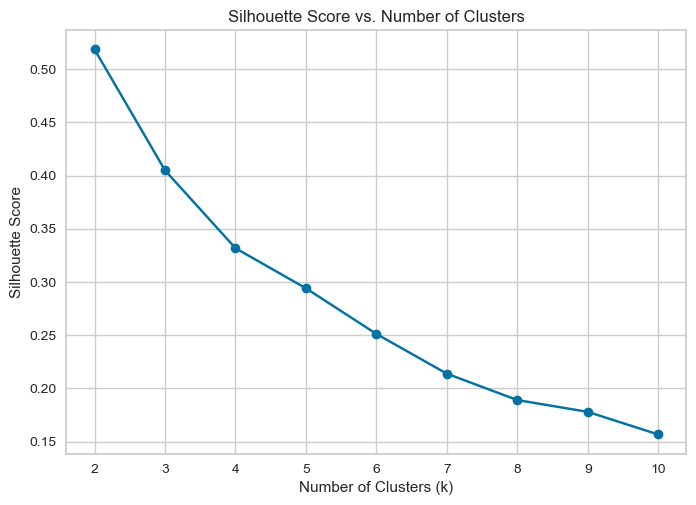

In [12]:
# Step 7: Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


In [21]:
# # Perform k-means clustering with the optimal K value on the training set
# best_kmeans = KMeans(n_clusters=elbow_point, random_state=42)
# best_kmeans.fit(scaled_features_2d_Train)


KMeans(n_clusters=3, random_state=42)

In [ ]:
# # Predict cluster labels for the test set
# test_predictions = best_kmeans.predict(scaled_test_features_2d)


In [75]:
import numpy as np

# Extract the labels
labels = labels_df.values

# Convert labels to string data type
labels = labels.astype(str)
num_clusters = elbow_point
# Perform k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features_2d_Train)
cluster_labels = kmeans.labels_

# Create a dictionary to store the count of values in each class for each cluster
cluster_class_counts = {cluster: {} for cluster in range(num_clusters)}

# Count the values in each class for each cluster
for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    cluster_labels_subset = labels[cluster_indices]
    unique_classes, class_counts = np.unique(cluster_labels_subset, return_counts=True)

    # Sort the unique_classes and class_counts together using numpy.lexsort
    sort_indices = np.lexsort((class_counts, unique_classes))
    unique_classes_sorted = unique_classes[sort_indices]
    class_counts_sorted = class_counts[sort_indices]

    cluster_class_counts[cluster] = dict(zip(unique_classes_sorted, class_counts_sorted))

# Display the count of values in each class for each cluster
print("Count of values in each class for each cluster:")
for cluster, class_counts in cluster_class_counts.items():
    print(f"Cluster {cluster+1}: {class_counts}")



Count of values in each class for each cluster:
Cluster 1: {'1': 24, '10': 58, '11': 34, '12': 29, '13': 63, '14': 12, '15': 32, '16': 17, '17': 37, '18': 8, '1st': 313, '2': 15, '2nd': 323, '3': 50, '4': 13, '5': 42, '6': 41, '7': 66, '8': 39, '9': 56, 'Dogs are sitting by the door': 318, 'F': 232, 'Kids are talking by the door': 318, 'M': 404, 'angry': 96, 'audio-only': 636, 'calm': 98, 'disgust': 54, 'fearful': 111, 'happy': 85, 'neutral': 56, 'normal': 355, 'sad': 82, 'song': 249, 'speech': 387, 'strong': 281, 'surprised': 54}
Cluster 2: {'1': 80, '10': 33, '11': 1, '12': 73, '13': 4, '14': 92, '15': 5, '16': 87, '17': 13, '18': 52, '1st': 380, '2': 89, '2nd': 389, '3': 46, '4': 90, '5': 2, '6': 63, '7': 26, '9': 13, 'Dogs are sitting by the door': 424, 'F': 579, 'Kids are talking by the door': 345, 'M': 190, 'angry': 164, 'audio-only': 769, 'calm': 88, 'disgust': 57, 'fearful': 114, 'happy': 136, 'neutral': 37, 'normal': 352, 'sad': 115, 'song': 374, 'speech': 395, 'strong': 417, 

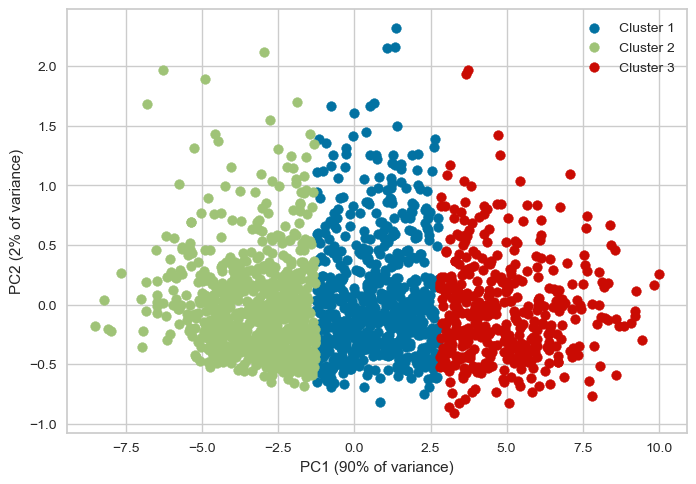

In [79]:
# Feature based Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Create an instance of PCA
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(scaled_features_2d_Train)

# Transform the data to the lower-dimensional space
transformed_data = pca.transform(scaled_features_2d_Train)

# Feature based Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Create an instance of PCA
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(scaled_features_2d_Train)

# Transform the data to the lower-dimensional space
transformed_data = pca.transform(scaled_features_2d_Train)

# Create an empty list for storing the data points of each cluster
cluster_points = [[] for _ in range(num_clusters)]

# Separate the data points by cluster
for i, point in enumerate(transformed_data):
    cluster_points[cluster_labels[i]].append(point)

# Plot the transformed data points for each cluster
for cluster, points in enumerate(cluster_points):
    points = np.array(points)
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {cluster+1}")

# Add labels and show the plot
plt.xlabel("PC1 (90% of variance)")
plt.ylabel("PC2 (2% of variance)")
# Add a title to the plot with the variance values
variances = pca.explained_variance_ratio_
# plt.title(f"PCA Plot (Variances: PC1={variances[0]:.2f}, PC2={variances[1]:.2f})")

plt.legend()
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


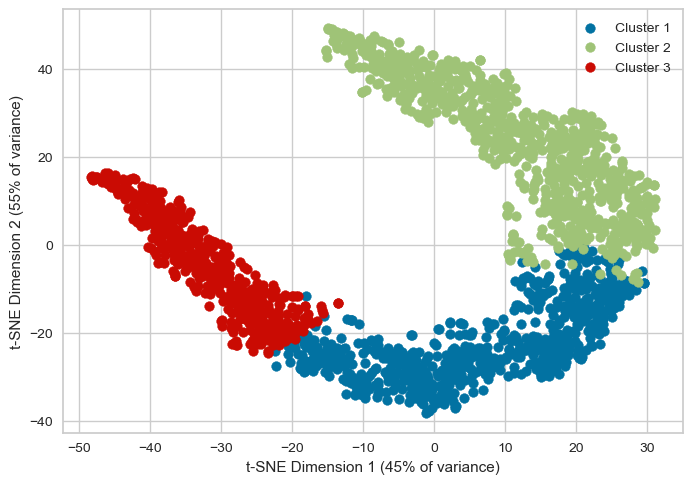

In [81]:
# tsne
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Create an instance of t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit the t-SNE model to the data
transformed_data = tsne.fit_transform(scaled_features_2d_Train)

# Create an empty list for storing the data points of each cluster
cluster_points = [[] for _ in range(num_clusters)]

# Separate the data points by cluster
for i, point in enumerate(transformed_data):
    cluster_points[cluster_labels[i]].append(point)

# Plot the transformed data points for each cluster
for cluster, points in enumerate(cluster_points):
    points = np.array(points)
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {cluster+1}")

variances = np.var(transformed_data, axis=0) / np.sum(np.var(transformed_data, axis=0))
plt.xlabel(f"t-SNE Dimension 1 ({variances[0]*100:.0f}% of variance)")
plt.ylabel(f"t-SNE Dimension 2 ({variances[1]*100:.0f}% of variance)")
plt.legend()
plt.show()


In [73]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

def get_cluster_class_counts(num_clusters):
    # Extract the labels
    labels = labels_df.values

    # Convert labels to string data type
    labels = labels.astype(str)

    # Reshape the scaled_features array
    scaled_features_2d = scaled_features_Train.reshape(scaled_features_Train.shape[0], -1)

    # Perform k-means clustering with the chosen number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_features_2d)
    cluster_labels = kmeans.labels_

    # Create a dictionary to store the count of values in each class for each cluster
    cluster_class_counts = {cluster: {} for cluster in range(num_clusters)}

    # Count the values in each class for each cluster
    for cluster in range(num_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        cluster_labels_subset = labels[cluster_indices]
        unique_classes, class_counts = np.unique(cluster_labels_subset, return_counts=True)

        # Sort the unique_classes and class_counts together using numpy.lexsort
        sort_indices = np.lexsort((class_counts, unique_classes))
        unique_classes_sorted = unique_classes[sort_indices]
        class_counts_sorted = class_counts[sort_indices]

        cluster_class_counts[cluster] = dict(zip(unique_classes_sorted, class_counts_sorted))

    # Create a table to display the count of values in each class for each cluster
    table_data = {}
    for cluster, class_counts in cluster_class_counts.items():
        cluster_name = f"Cluster {cluster+1}"
        table_data[cluster_name] = class_counts

    table = pd.DataFrame(table_data)
    table.index.name = "Class"
    table = table.fillna(0).astype(int)

    # Transpose the table
    transposed_table = table.transpose()

    # Return the specified class labels from the transposed table
    class_labels = ["F", "M","speech", "song", "normal", "strong" , "Dogs are sitting by the door", "Kids are talking by the door"]
    return transposed_table[class_labels]



In [74]:
# With 3 Clusters
num_clusters = 3  # Replace with your desired number of clusters
result = get_cluster_class_counts(num_clusters)
print(result)

Class        F    M  speech  song  normal  strong  \
Cluster 1  232  404     387   249     355     281   
Cluster 2  579  190     395   374     352     417   
Cluster 3   81  342     298   125     277     146   

Class      Dogs are sitting by the door  Kids are talking by the door  
Cluster 1                           318                           318  
Cluster 2                           424                           345  
Cluster 3                           172                           251  


In [16]:
# With 2 Clusters
num_clusters = 2  # Replace with your desired number of clusters
result = get_cluster_class_counts(num_clusters)
print(result)

Class      angry  calm  disgust  fearful  happy  neutral  sad  surprised    F  \
Cluster 1     76   140       66      120    115       65  130         68  182   
Cluster 2    204   140       78      160    165       75  150         76  710   

Class        M  speech  song  normal  strong  
Cluster 1  598     505   275     468     312  
Cluster 2  338     575   473     516     532  


# Testing

In [ ]:
# Feature based Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming 'scaled_features_2d_Train' contains the scaled features for training data
# Assuming 'labels_df' contains the labels
# Assuming 'elbow_point' contains the chosen number of clusters

# This code is performing k-means clustering on the scaled training data (`scaled_features_2d_Train`) with the number of clusters specified by `elbow_point`. The labels for the data points are extracted from `labels_df` and converted to a string data type. The k-means algorithm is then applied to the data, and the resulting cluster labels are stored in `cluster_labels`.
# # Extract the labels
# labels = labels_df.values

# # Convert labels to string data type
# labels = labels.astype(str)
# num_clusters = elbow_point

# # Perform k-means clustering with the chosen number of clusters
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# kmeans.fit(scaled_features_2d_Train)
# cluster_labels = kmeans.labels_

# Create an instance of PCA
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(scaled_features_2d_Train)

# Transform the data to the lower-dimensional space
transformed_data = pca.transform(scaled_features_2d_Train)

# Feature based Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming 'scaled_features_2d_Train' contains the scaled features for training data
# Assuming 'labels_df' contains the labels
# Assuming 'elbow_point' contains the chosen number of clusters

# This code is performing k-means clustering on the scaled training data (`scaled_features_2d_Train`) with the number of clusters specified by `elbow_point`. The labels for the data points are extracted from `labels_df` and converted to a string data type. The k-means algorithm is then applied to the data, and the resulting cluster labels are stored in `cluster_labels`.
# # Extract the labels
# labels = labels_df.values

# # Convert labels to string data type
# labels = labels.astype(str)
# num_clusters = elbow_point

# # Perform k-means clustering with the chosen number of clusters
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# kmeans.fit(scaled_features_2d_Train)
# cluster_labels = kmeans.labels_

# Create an instance of PCA
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(scaled_features_2d_Train)

# Transform the data to the lower-dimensional space
transformed_data = pca.transform(scaled_features_2d_Train)

# Create an empty list for storing the data points of each cluster
cluster_points = [[] for _ in range(num_clusters)]

# Separate the data points by cluster
for i, point in enumerate(transformed_data):
    cluster_points[cluster_labels[i]].append(point)

# Plot the transformed data points for each cluster
for cluster, points in enumerate(cluster_points):
    points = np.array(points)
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {cluster+1}")

# Add labels and show the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# Feature Based Clustering Testing

In [28]:
# Testing with X test also
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 4: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 11)  # Set the range of cluster numbers to try
elbow_scores = []  # To store the sum of squared distances (inertia) for each cluster number
silhouette_scores = []  # To store the silhouette scores for each cluster number

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features_2d)
    
    # Elbow method: Compute the sum of squared distances
    elbow_scores.append(kmeans.inertia_)
    
    # Silhouette score: Compute the average silhouette score
    if len(np.unique(kmeans.labels_)) > 1:
        silhouette_scores.append(silhouette_score(scaled_features_2d, kmeans.labels_))

# Step 5: Find the best K value based on the silhouette score
best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# Step 6: Plot the elbow method results
plt.plot(cluster_range, elbow_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

# Step 7: Plot the silhouette scores
if silhouette_scores:
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores')
    plt.show()

print("Best K value based on the silhouette score:", best_k)


NameError: name 'scaled_features_2d' is not defined

In [29]:
# Perform k-means clustering with the best K value on the training set
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
best_kmeans.fit(scaled_features_2d)

# Predict cluster labels for the test set
test_predictions = best_kmeans.predict(X_test.reshape(X_test.shape[0], -1))

# Evaluate the clustering performance on the test set
test_silhouette_score = silhouette_score(X_test.reshape(X_test.shape[0], -1), test_predictions)

print("Silhouette score on the test set:", test_silhouette_score)

NameError: name 'best_k' is not defined

In [21]:
# Main 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 4: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 11)  # Set the range of cluster numbers to try
elbow_scores = []  # To store the sum of squared distances (inertia) for each cluster number
silhouette_scores = []  # To store the silhouette scores for each cluster number

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features_2d)
    
    # Elbow method: Compute the sum of squared distances
    elbow_scores.append(kmeans.inertia_)
    
    # Silhouette score: Compute the average silhouette score
    if len(np.unique(kmeans.labels_)) > 1:
        silhouette_scores.append(silhouette_score(scaled_features_2d, kmeans.labels_))

# Step 5: Find the best K value based on the silhouette score
best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# Step 6: Plot the elbow method results
plt.plot(cluster_range, elbow_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

# Step 7: Plot the silhouette scores
if silhouette_scores:
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores')
    plt.show()

print("Best K value based on the elbow method:", best_k)


NameError: name 'scaled_features_2d' is not defined

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
sil_visualizer = SilhouetteVisualizer(kmeans)
sil_visualizer.fit(X_robust)    
sil_visualizer.show()

In [ ]:
elb_visualizer = KElbowVisualizer(kmeans, k=(1,11))
elb_visualizer.fit(X_robust)    
elb_visualizer.show() 

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

In [27]:
import numpy as np

# Extract the labels
labels = labels_df.values

# Convert labels to string data type
labels = labels.astype(str)

# Reshape the scaled_features array
scaled_features_2d = scaled_features.reshape(scaled_features.shape[0], -1)

# Perform k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features_2d)
cluster_labels = kmeans.labels_

# Create a dictionary to store the count of values in each class for each cluster
cluster_class_counts = {cluster: {} for cluster in range(num_clusters)}

# Count the values in each class for each cluster
for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    cluster_labels_subset = labels[cluster_indices]
    unique_classes, class_counts = np.unique(cluster_labels_subset, return_counts=True)

    # Sort the unique_classes and class_counts together using numpy.lexsort
    sort_indices = np.lexsort((class_counts, unique_classes))
    unique_classes_sorted = unique_classes[sort_indices]
    class_counts_sorted = class_counts[sort_indices]

    cluster_class_counts[cluster] = dict(zip(unique_classes_sorted, class_counts_sorted))

# Display the count of values in each class for each cluster
print("Count of values in each class for each cluster:")
for cluster, class_counts in cluster_class_counts.items():
    print(f"Cluster {cluster+1}: {class_counts}")


NameError: name 'scaled_features' is not defined

In [114]:
# Define the number of clusters
num_clusters = 4  # Replace with your desired number of clusters

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features_2d)
cluster_labels = kmeans.labels_

# Create a dictionary to store the count of values in each class for each cluster
cluster_class_counts = {cluster: {} for cluster in range(num_clusters)}

# Count the values in each class for each cluster
for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    cluster_labels_subset = labels[cluster_indices]
    unique_classes, class_counts = np.unique(cluster_labels_subset, return_counts=True)

    cluster_class_counts[cluster] = dict(zip(unique_classes, class_counts))

# Display the count of values in each class for each cluster
cluster_class_labels = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']
for cluster in range(num_clusters):
    print(f"Cluster {cluster+1}:")
    for class_label in cluster_class_labels:
        count = cluster_class_counts[cluster].get(class_label, 0)
        print(f"{class_label}: {count}")
    print()
# 



Cluster 1:
Walking: 0
Walking Upstairs: 0
Walking Downstairs: 0
Sitting: 0
Standing: 0
Laying: 0

Cluster 2:
Walking: 0
Walking Upstairs: 0
Walking Downstairs: 0
Sitting: 0
Standing: 0
Laying: 0

Cluster 3:
Walking: 0
Walking Upstairs: 0
Walking Downstairs: 0
Sitting: 0
Standing: 0
Laying: 0

Cluster 4:
Walking: 0
Walking Upstairs: 0
Walking Downstairs: 0
Sitting: 0
Standing: 0
Laying: 0



In [130]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

def get_cluster_class_counts(num_clusters):
    # Extract the labels
    labels = labels_df.values

    # Convert labels to string data type
    labels = labels.astype(str)

    # Reshape the scaled_features array
    scaled_features_2d = scaled_features.reshape(scaled_features.shape[0], -1)

    # Perform k-means clustering with the chosen number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_features_2d)
    cluster_labels = kmeans.labels_

    # Create a dictionary to store the count of values in each class for each cluster
    cluster_class_counts = {cluster: {} for cluster in range(num_clusters)}

    # Count the values in each class for each cluster
    for cluster in range(num_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        cluster_labels_subset = labels[cluster_indices]
        unique_classes, class_counts = np.unique(cluster_labels_subset, return_counts=True)

        # Sort the unique_classes and class_counts together using numpy.lexsort
        sort_indices = np.lexsort((class_counts, unique_classes))
        unique_classes_sorted = unique_classes[sort_indices]
        class_counts_sorted = class_counts[sort_indices]

        cluster_class_counts[cluster] = dict(zip(unique_classes_sorted, class_counts_sorted))

    # Create a table to display the count of values in each class for each cluster
    table_data = {}
    for cluster, class_counts in cluster_class_counts.items():
        cluster_name = f"Cluster {cluster+1}"
        table_data[cluster_name] = class_counts

    table = pd.DataFrame(table_data)
    table.index.name = "Class"
    table = table.fillna(0).astype(int)

    # Transpose the table
    transposed_table = table.transpose()

    # Return the specified class labels from the transposed table
    class_labels = ["angry", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"]
    return transposed_table[class_labels]



In [133]:
# With 4 Clusters
num_clusters = 3  # Replace with your desired number of clusters
result = get_cluster_class_counts(num_clusters)
print(result)

Class      angry  calm  disgust  fearful  happy  neutral  sad  surprised
Cluster 1      4    19        2        6     10        9   15          6
Cluster 2     52    12        6       25     26        2   12          4
Cluster 3     24    31       29       42     39       20   37         19
Cluster 4     16    35       13       25     23       18   34         19


In [134]:
# With 2 Clusters
num_clusters = 2  # Replace with your desired number of clusters
result = get_cluster_class_counts(num_clusters)
print(result)

Class      angry  calm  disgust  fearful  happy  neutral  sad  surprised
Cluster 1     16    42        9       21     25       24   32         18
Cluster 2     80    55       41       77     73       25   66         30


# Distance Based Clustering Final

In [51]:
# from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer
# import matplotlib.pyplot as plt

# # labels = y_test
# # Step 4: Perform k-means clustering with different numbers of clusters
# cluster_range = range(2, 11)  # Set the range of cluster numbers to try
# elbow_scores = []  # To store the sum of squared distances (inertia) for each cluster number

# for n_clusters in cluster_range:
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     kmeans.fit(scaled_features_2d_Train)
    
#     # Elbow method: Compute the sum of squared distances
#     elbow_scores.append(kmeans.inertia_)

# # Step 5: Plot the elbow method results
# elb_visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1, 11))
# elb_visualizer.fit(scaled_features_2d_Train)
# elb_visualizer.show()

# # Step 6: Find the elbow point
# elbow_point = elb_visualizer.elbow_value_

# print("Elbow point based on the sum of squared distances:", elbow_point)


In [31]:
pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3566 sha256=a72e1ed21dfaa9cbe7aef4f952a601cdbe50a94ed40e05f00d0e8b19132709e5
  Stored in directory: /Users/arafathjazeeb/Library/Caches/pip/wheels/1f/a1/63/bfd0fddb5bf0b59f564872e29272cee8a2de0cd745d88fede5
Successfully built fastdtw
Note: you may need to restart the kernel to use updated packages.


In [56]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

# Define a custom distance function using DTW
def dtw_distance(x, y):
    _, dist = fastdtw(x, y, dist=euclidean)
    return dist

def get_cluster_class_counts(num_clusters):
    # Extract the labels
    labels = labels_df.values

    # Convert labels to string data type
    labels = labels.astype(str)

    # Reshape the scaled_features array
    scaled_features_2d = scaled_features_Train.reshape(scaled_features_Train.shape[0], -1)

    # Perform k-means clustering with the chosen number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.inertia_ = np.inf  # Initialize inertia_ to infinity
    kmeans.transform = dtw_distance  # Set the transform method to use DTW distance
    
    kmeans.fit(data)
    cluster_labels = kmeans.labels_

    # Create a dictionary to store the count of values in each class for each cluster
    cluster_class_counts = {cluster: {} for cluster in range(num_clusters)}

    # Count the values in each class for each cluster
    for cluster in range(num_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        cluster_labels_subset = labels[cluster_indices]
        unique_classes, class_counts = np.unique(cluster_labels_subset, return_counts=True)

        # Sort the unique_classes and class_counts together using numpy.lexsort
        sort_indices = np.lexsort((class_counts, unique_classes))
        unique_classes_sorted = unique_classes[sort_indices]
        class_counts_sorted = class_counts[sort_indices]

        cluster_class_counts[cluster] = dict(zip(unique_classes_sorted, class_counts_sorted))

    # Create a table to display the count of values in each class for each cluster
    table_data = {}
    for cluster, class_counts in cluster_class_counts.items():
        cluster_name = f"Cluster {cluster+1}"
        table_data[cluster_name] = class_counts

    table = pd.DataFrame(table_data)
    table.index.name = "Class"
    table = table.fillna(0).astype(int)

    # Transpose the table
    transposed_table = table.transpose()

    # Return the specified class labels from the transposed table
    class_labels = ["angry", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "F", "M", "speech", "song", "normal", "strong"]
    return transposed_table[class_labels]




/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


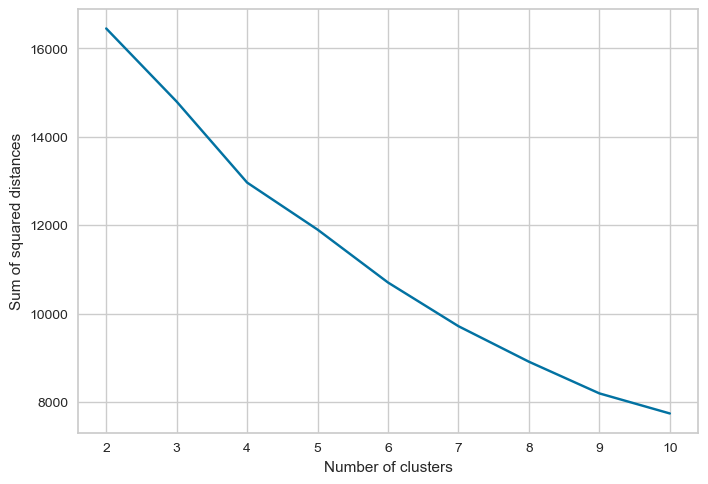

Elbow point based on the sum of squared distances: 3


In [60]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import numpy as np
from tslearn.piecewise import PiecewiseAggregateApproximation

# Define a custom distance function using DTW
def dtw_distance(x, y):
    _, dist = fastdtw(x, y, dist=euclidean)
    return dist

# Step 1: Perform PAA on the data to reduce the number of instances
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
data_paa = paa.fit_transform(data)

# Step 2: Reshape the data to be 2D
n_instances, n_paa_features, n_channels = data_paa.shape
data_paa = data_paa.reshape((n_instances, n_paa_features * n_channels))

# Step 3: Scale the data to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_paa = scaler.fit_transform(data_paa)

# Step 4: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 11)  # Set the range of cluster numbers to try
elbow_scores = []  # To store the sum of squared distances (inertia) for each cluster number

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.inertia_ = np.inf  # Initialize inertia_ to infinity
    kmeans.transform = dtw_distance  # Set the transform method to use DTW distance
    
    kmeans.fit(scaled_data_paa)
    
    # Elbow method: Compute the sum of squared distances
    elbow_scores.append(kmeans.inertia_)

# Step 5: Plot the elbow method results
plt.plot(cluster_range, elbow_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

# Step 6: Find the elbow point
elbow_point = np.argmin(np.diff(elbow_scores)) + 2  # Add 2 to account for starting from 2 clusters

print("Elbow point based on the sum of squared distances:", elbow_point)

# Step 7: Perform k-means clustering with the elbow point as the number of clusters
kmeans = KMeans(n_clusters=elbow_point, random_state=42)
kmeans.inertia_ = np.inf  # Initialize inertia_ to infinity
kmeans.transform = dtw_distance  # Set the transform method to use DTW distance
    
kmeans.fit(scaled_data_paa)

# Step 8: Get the cluster labels for each instance
cluster_labels = kmeans.predict(scaled_data_paa)

In [57]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import numpy as np

# Define a custom distance function using DTW
def dtw_distance(x, y):
    _, dist = fastdtw(x, y, dist=euclidean)
    return dist

# Step 4: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 11)  # Set the range of cluster numbers to try
elbow_scores = []  # To store the sum of squared distances (inertia) for each cluster number

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.inertia_ = np.inf  # Initialize inertia_ to infinity
    kmeans.transform = dtw_distance  # Set the transform method to use DTW distance
    
    kmeans.fit(data)
    
    # Elbow method: Compute the sum of squared distances
    elbow_scores.append(kmeans.inertia_)

# Step 5: Plot the elbow method results
elb_visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1, 11))
elb_visualizer.fit(scaled_features_2d_Train)
elb_visualizer.show()

# Step 6: Find the elbow point
elbow_point = elb_visualizer.elbow_value_

print("Elbow point based on the sum of squared distances:", elbow_point)


KeyboardInterrupt: 

In [37]:
kmeans = KMeans(3, random_state=42)
kmeans.inertia_ = np.inf  # Initialize inertia_ to infinity
kmeans.transform = dtw_distance  # Set the transform method to use DTW distance
kmeans.fit(scaled_features_2d_Train)

KMeans(n_clusters=3, random_state=42)

In [38]:
cluster_labels = kmeans.labels_

In [39]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [44]:
import numpy as np

# Extract the labels
labels = labels_df.values

# Convert labels to string data type
labels = labels.astype(str)
num_clusters = elbow_point
# Perform k-means clustering with the chosen number of clusters
kmeans = KMeans(3, random_state=42)
kmeans.inertia_ = np.inf  # Initialize inertia_ to infinity
kmeans.transform = dtw_distance  # Set the transform method to use DTW distance
kmeans.fit(scaled_features_2d_Train)
cluster_labels = kmeans.labels_

# Create a dictionary to store the count of values in each class for each cluster
cluster_class_counts = {cluster: {} for cluster in range(num_clusters)}

# Count the values in each class for each cluster
for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    cluster_labels_subset = labels[cluster_indices]
    unique_classes, class_counts = np.unique(cluster_labels_subset, return_counts=True)

    # Sort the unique_classes and class_counts together using numpy.lexsort
    sort_indices = np.lexsort((class_counts, unique_classes))
    unique_classes_sorted = unique_classes[sort_indices]
    class_counts_sorted = class_counts[sort_indices]

    cluster_class_counts[cluster] = dict(zip(unique_classes_sorted, class_counts_sorted))

# Display the count of values in each class for each cluster
print("Count of values in each class for each cluster:")
for cluster, class_counts in cluster_class_counts.items():
    print(f"Cluster {cluster+1}: {class_counts}")


Count of values in each class for each cluster:
Cluster 1: {'1': 24, '10': 58, '11': 34, '12': 29, '13': 63, '14': 12, '15': 32, '16': 17, '17': 37, '18': 8, '1st': 313, '2': 15, '2nd': 323, '3': 50, '4': 13, '5': 42, '6': 41, '7': 66, '8': 39, '9': 56, 'Dogs are sitting by the door': 318, 'F': 232, 'Kids are talking by the door': 318, 'M': 404, 'angry': 96, 'audio-only': 636, 'calm': 98, 'disgust': 54, 'fearful': 111, 'happy': 85, 'neutral': 56, 'normal': 355, 'sad': 82, 'song': 249, 'speech': 387, 'strong': 281, 'surprised': 54}
Cluster 2: {'1': 80, '10': 33, '11': 1, '12': 73, '13': 4, '14': 92, '15': 5, '16': 87, '17': 13, '18': 52, '1st': 380, '2': 89, '2nd': 389, '3': 46, '4': 90, '5': 2, '6': 63, '7': 26, '9': 13, 'Dogs are sitting by the door': 424, 'F': 579, 'Kids are talking by the door': 345, 'M': 190, 'angry': 164, 'audio-only': 769, 'calm': 88, 'disgust': 57, 'fearful': 114, 'happy': 136, 'neutral': 37, 'normal': 352, 'sad': 115, 'song': 374, 'speech': 395, 'strong': 417, 

In [50]:
# With 3 Clusters
num_clusters = 3  # Replace with your desired number of clusters
result = get_cluster_class_counts(num_clusters)
print(result)

Class      angry  calm  disgust  fearful  happy  neutral  sad  surprised    F  \
Cluster 1     96    98       54      111     85       56   82         54  232   
Cluster 2    164    88       57      114    136       37  115         58  579   
Cluster 3     20    94       33       55     59       47   83         32   81   

Class        M  speech  song  normal  strong  
Cluster 1  404     387   249     355     281  
Cluster 2  190     395   374     352     417  
Cluster 3  342     298   125     277     146  


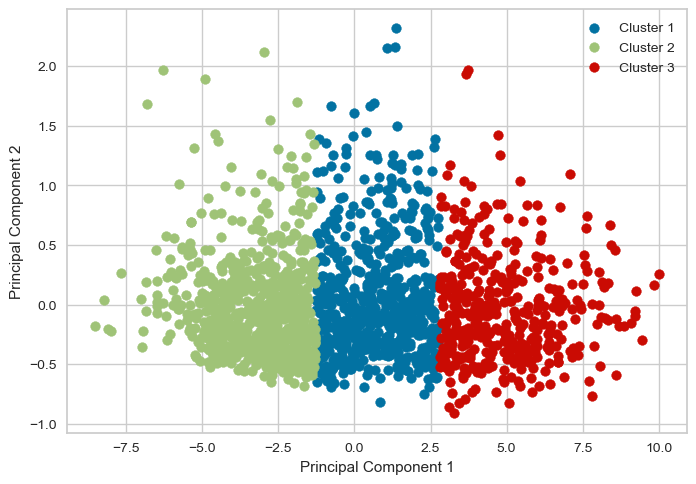

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create an instance of PCA
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(scaled_features_2d_Train)

# Transform the data to the lower-dimensional space
transformed_data = pca.transform(scaled_features_2d_Train)

# Create an empty list for storing the data points of each cluster
cluster_points = [[] for _ in range(num_clusters)]

# Separate the data points by cluster
for i, point in enumerate(transformed_data):
    cluster_points[cluster_labels[i]].append(point)

# Plot the transformed data points for each cluster
for cluster, points in enumerate(cluster_points):
    points = np.array(points)
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {cluster+1}")

# Add labels and show the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


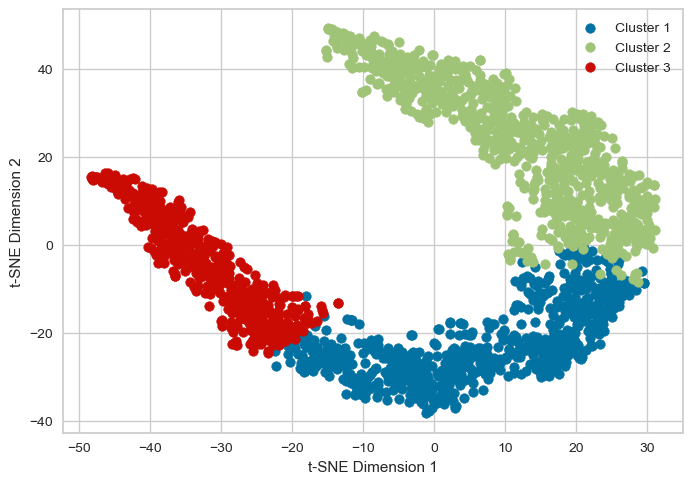

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Create an instance of t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit the t-SNE model to the data
transformed_data = tsne.fit_transform(scaled_features_2d_Train)

# Create an empty list for storing the data points of each cluster
cluster_points = [[] for _ in range(num_clusters)]

# Separate the data points by cluster
for i, point in enumerate(transformed_data):
    cluster_points[cluster_labels[i]].append(point)

# Plot the transformed data points for each cluster
for cluster, points in enumerate(cluster_points):
    points = np.array(points)
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {cluster+1}")

# Add labels and show the plot
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


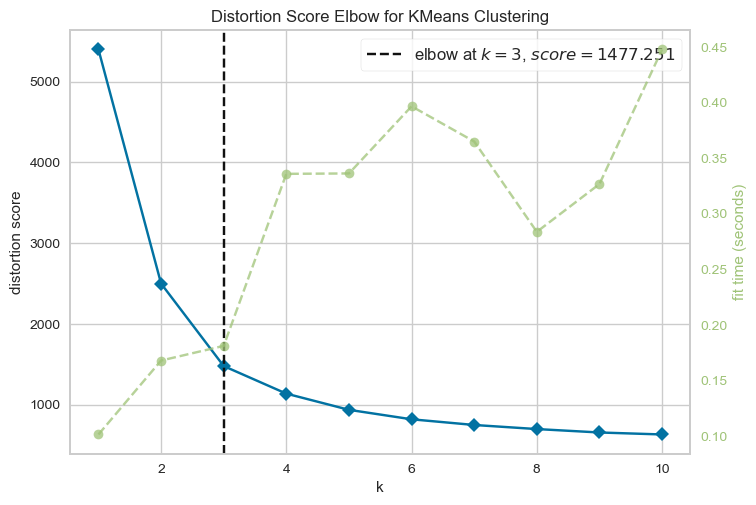

Elbow point based on the sum of squared distances: 3
Best value of k based on silhouette score: 2
Silhouette score for the best value of k: 0.46740944472856744


In [17]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from yellowbrick.cluster import KElbowVisualizer
# import matplotlib.pyplot as plt

# # Step 4: Perform k-means clustering with different numbers of clusters
# cluster_range = range(2, 11)  # Set the range of cluster numbers to try
# elbow_scores = []  # To store the sum of squared distances (inertia) for each cluster number
# silhouette_scores = []  # To store the silhouette scores for each cluster number

# for n_clusters in cluster_range:
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     kmeans.fit(scaled_features_2d_Test)
    
#     # Elbow method: Compute the sum of squared distances
#     elbow_scores.append(kmeans.inertia_)
    
#     # Silhouette score: Compute the average silhouette score
#     silhouette = silhouette_score(scaled_features_2d_Test, kmeans.labels_)
#     silhouette_scores.append(silhouette)

# # Step 5: Plot the elbow method results
# elb_visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1, 11))
# elb_visualizer.fit(scaled_features_2d_Test)
# elb_visualizer.show()

# # Step 6: Find the elbow point and best k based on silhouette score
# elbow_point = elb_visualizer.elbow_value_
# best_k = silhouette_scores.index(max(silhouette_scores)) + 2
# best_score = silhouette_scores[best_k - 2]

# print("Elbow point based on the sum of squared distances:", elbow_point)
# print("Best value of k based on silhouette score:", best_k)
# print("Silhouette score for the best value of k:", best_score)


ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

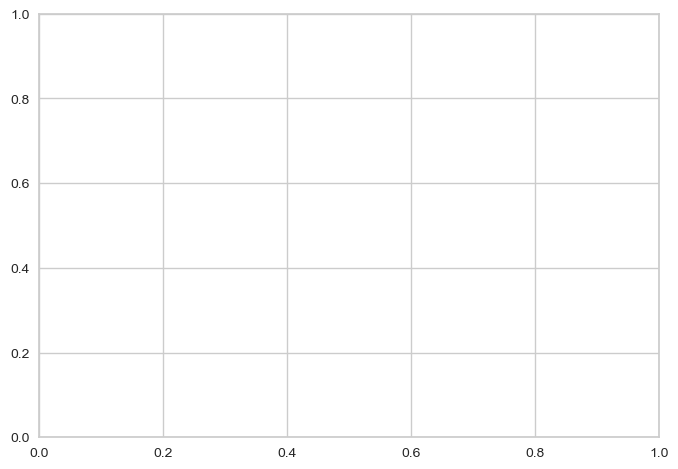

In [35]:
# # Step 7: Plot the silhouette scores
# plt.plot(cluster_range, silhouette_scores, marker='o')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score vs. Number of Clusters')
# plt.show()


In [ ]:
# # Perform k-means clustering with the optimal K value on the training set
# best_kmeans = KMeans(n_clusters=elbow_point, random_state=42)
# best_kmeans.fit(scaled_features_2d_Train)


KMeans(n_clusters=3, random_state=42)

In [ ]:
# # Predict cluster labels for the test set
# test_predictions = best_kmeans.predict(scaled_test_features_2d)


In [18]:
import numpy as np

# Extract the labels
labels = labels_df.values

# Convert labels to string data type
labels = labels.astype(str)
num_clusters = elbow_point
# Perform k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features_2d_Test)
cluster_labels = kmeans.labels_

# Create a dictionary to store the count of values in each class for each cluster
cluster_class_counts = {cluster: {} for cluster in range(num_clusters)}

# Count the values in each class for each cluster
for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    cluster_labels_subset = labels[cluster_indices]
    unique_classes, class_counts = np.unique(cluster_labels_subset, return_counts=True)

    # Sort the unique_classes and class_counts together using numpy.lexsort
    sort_indices = np.lexsort((class_counts, unique_classes))
    unique_classes_sorted = unique_classes[sort_indices]
    class_counts_sorted = class_counts[sort_indices]

    cluster_class_counts[cluster] = dict(zip(unique_classes_sorted, class_counts_sorted))

# Display the count of values in each class for each cluster
print("Count of values in each class for each cluster:")
for cluster, class_counts in cluster_class_counts.items():
    print(f"Cluster {cluster+1}: {class_counts}")


Count of values in each class for each cluster:
Cluster 1: {'1': 62, '1st': 48, '2': 2, '2nd': 40, '3': 6, '5': 17, '6': 1, 'Dogs are sitting by the door': 40, 'F': 3, 'Kids are talking by the door': 48, 'M': 85, 'angry': 7, 'audio-only': 88, 'calm': 21, 'disgust': 4, 'fearful': 8, 'happy': 16, 'neutral': 10, 'normal': 60, 'sad': 15, 'song': 38, 'speech': 50, 'strong': 28, 'surprised': 7}
Cluster 2: {'1': 5, '1st': 118, '2': 54, '2nd': 122, '3': 30, '4': 54, '5': 21, '6': 73, '7': 3, 'Dogs are sitting by the door': 130, 'F': 181, 'Kids are talking by the door': 110, 'M': 59, 'angry': 61, 'audio-only': 240, 'calm': 23, 'disgust': 14, 'fearful': 44, 'happy': 33, 'neutral': 18, 'normal': 112, 'sad': 34, 'song': 145, 'speech': 95, 'strong': 128, 'surprised': 13}
Cluster 3: {'1': 37, '1st': 151, '2': 48, '2nd': 155, '3': 68, '4': 50, '5': 66, '6': 30, '7': 7, 'Dogs are sitting by the door': 146, 'F': 128, 'Kids are talking by the door': 160, 'M': 178, 'angry': 28, 'audio-only': 306, 'calm':

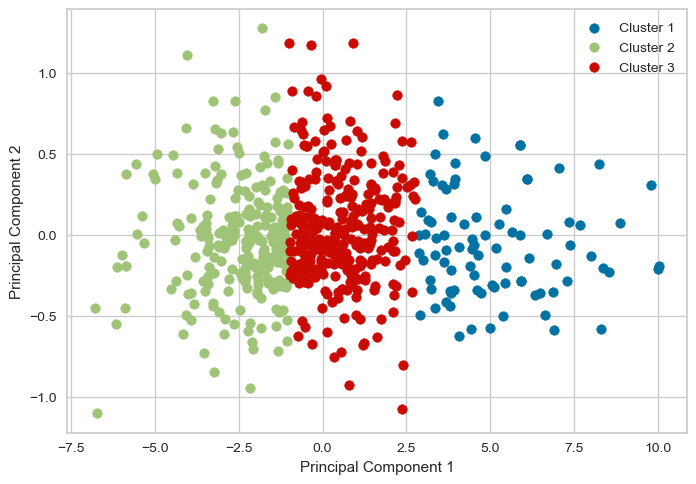

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create an instance of PCA
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(scaled_features_2d_Train)

# Transform the data to the lower-dimensional space
transformed_data = pca.transform(scaled_features_2d_Train)

# Create an empty list for storing the data points of each cluster
cluster_points = [[] for _ in range(num_clusters)]

# Separate the data points by cluster
for i, point in enumerate(transformed_data):
    cluster_points[cluster_labels[i]].append(point)

# Plot the transformed data points for each cluster
for cluster, points in enumerate(cluster_points):
    points = np.array(points)
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {cluster+1}")

# Add labels and show the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


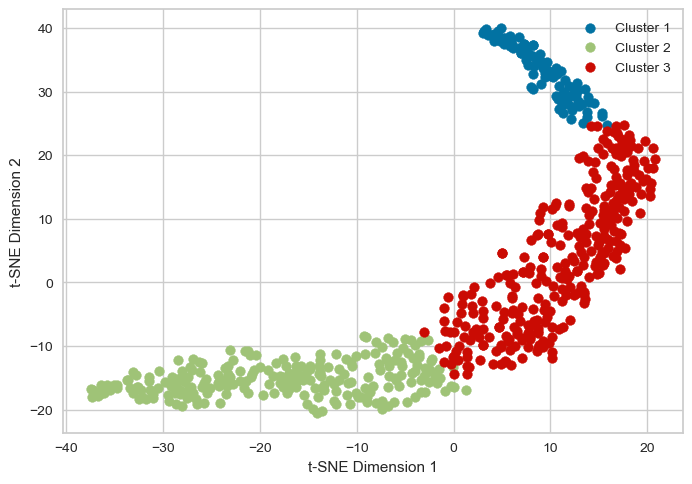

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Create an instance of t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit the t-SNE model to the data
transformed_data = tsne.fit_transform(scaled_features_2d_Test)

# Create an empty list for storing the data points of each cluster
cluster_points = [[] for _ in range(num_clusters)]

# Separate the data points by cluster
for i, point in enumerate(transformed_data):
    cluster_points[cluster_labels[i]].append(point)

# Plot the transformed data points for each cluster
for cluster, points in enumerate(cluster_points):
    points = np.array(points)
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {cluster+1}")

# Add labels and show the plot
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


In [19]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

def get_cluster_class_counts(num_clusters):
    # Extract the labels
    labels = labels_df.values

    # Convert labels to string data type
    labels = labels.astype(str)

    # Reshape the scaled_features array
    scaled_features_2d = scaled_features_Train.reshape(scaled_features_Train.shape[0], -1)

    # Perform k-means clustering with the chosen number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_features_2d_Test)
    cluster_labels = kmeans.labels_

    # Create a dictionary to store the count of values in each class for each cluster
    cluster_class_counts = {cluster: {} for cluster in range(num_clusters)}

    # Count the values in each class for each cluster
    for cluster in range(num_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        cluster_labels_subset = labels[cluster_indices]
        unique_classes, class_counts = np.unique(cluster_labels_subset, return_counts=True)

        # Sort the unique_classes and class_counts together using numpy.lexsort
        sort_indices = np.lexsort((class_counts, unique_classes))
        unique_classes_sorted = unique_classes[sort_indices]
        class_counts_sorted = class_counts[sort_indices]

        cluster_class_counts[cluster] = dict(zip(unique_classes_sorted, class_counts_sorted))

    # Create a table to display the count of values in each class for each cluster
    table_data = {}
    for cluster, class_counts in cluster_class_counts.items():
        cluster_name = f"Cluster {cluster+1}"
        table_data[cluster_name] = class_counts

    table = pd.DataFrame(table_data)
    table.index.name = "Class"
    table = table.fillna(0).astype(int)

    # Transpose the table
    transposed_table = table.transpose()

    # Return the specified class labels from the transposed table
    class_labels = ["angry", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "F", "M", "speech", "song", "normal", "strong"]
    return transposed_table[class_labels]




In [20]:
# With 3 Clusters
num_clusters = 3  # Replace with your desired number of clusters
result = get_cluster_class_counts(num_clusters)
print(result)’

Class      angry  calm  disgust  fearful  happy  neutral  sad  surprised    F  \
Cluster 1      7    21        4        8     16       10   15          7    3   
Cluster 2     61    23       14       44     33       18   34         13  181   
Cluster 3     28    58       30       44     47       24   47         28  128   

Class        M  speech  song  normal  strong  
Cluster 1   85      50    38      60      28  
Cluster 2   59      95   145     112     128  
Cluster 3  178     225    81     172     134  


In [34]:
# With 2 Clusters
num_clusters = 2  # Replace with your desired number of clusters
result = get_cluster_class_counts(num_clusters)
print(result)

Class      angry  calm  disgust  fearful  happy  neutral  sad  surprised    F  \
Cluster 1     17    43       10       21     26       21   31         18   38   
Cluster 2     79    59       38       75     70       31   65         30  274   

Class        M  speech  song  
Cluster 1  149     119    68  
Cluster 2  173     251   196  


# Distance Based Clustering

In [9]:
data.shape

(1828, 304304)

/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data pa

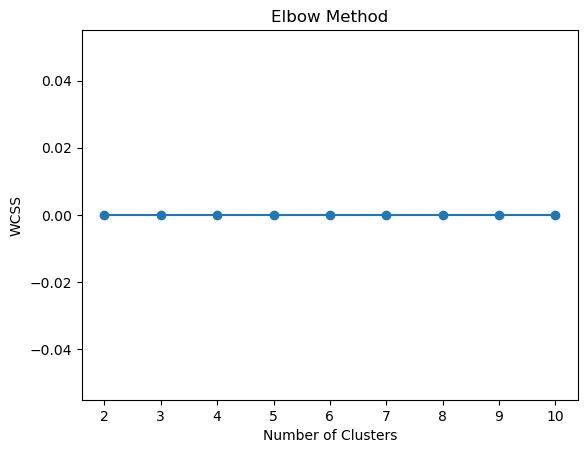

In [26]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.piecewise import SymbolicAggregateApproximation
import matplotlib.pyplot as plt

# Step 1: Scale the time series data
scaler = TimeSeriesScalerMinMax()
scaled_features_Train = scaler.fit_transform(data)

# Step 2: Apply Symbolic Aggregate Approximation (SAX)
sax = SymbolicAggregateApproximation(n_segments=10, alphabet_size_avg=5)
sax_data = sax.fit_transform(scaled_features_Train)

# Reshape sax_data to have 2 dimensions
sax_data = sax_data.reshape(sax_data.shape[0], -1)

# Step 3: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 11)
wcss_scores = []

for n_clusters in cluster_range:
    kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric='dtw', metric_params={"global_constraint": "sakoe_chiba", "sakoe_chiba_radius": 5})
    kmeans.fit(sax_data)
    
    # WCSS score: Compute the within-cluster sum of squares
    wcss_scores.append(np.sum(np.min(kmeans.transform(sax_data), axis=1)))

# Step 4: Plot the WCSS scores
plt.plot(cluster_range, wcss_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data pa

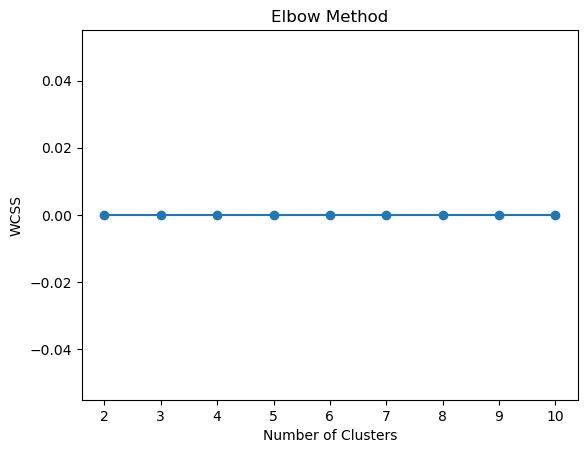

No valid silhouette scores calculated.


In [23]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.piecewise import SymbolicAggregateApproximation
import matplotlib.pyplot as plt

# Step 1: Scale the time series data
# scaler = TimeSeriesScalerMinMax()
# scaled_features_Train = scaler.fit_transform(data)

# Step 2: Apply Symbolic Aggregate Approximation (SAX)
sax = SymbolicAggregateApproximation(n_segments=10, alphabet_size_avg=5)
sax_data = sax.fit_transform(scaled_features_Train)

# Reshape sax_data to have 2 dimensions
sax_data = sax_data.reshape(sax_data.shape[0], -1)

# Step 3: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 11)
wcss_scores = []
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric='dtw', metric_params={"global_constraint": "sakoe_chiba", "sakoe_chiba_radius": 5})
    kmeans.fit(sax_data)
    
    # WCSS score: Compute the within-cluster sum of squares
    wcss_scores.append(np.sum(np.min(kmeans.transform(sax_data), axis=1)))
    
    # Silhouette score: Compute the average silhouette score
    if len(np.unique(kmeans.labels_)) > 1:
        silhouette_scores.append(silhouette_score(sax_data, kmeans.labels_))

# Step 4: Find the best K value based on the silhouette score
if silhouette_scores:
    best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]
else:
    best_k = None

# Step 5: Plot the WCSS scores
plt.plot(cluster_range, wcss_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Step 6: Plot the silhouette scores
if silhouette_scores:
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores')
    plt.show()

if best_k is not None:
    print("Best K value based on the silhouette score:", best_k)
else:
    print("No valid silhouette scores calculated.")


/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data pa

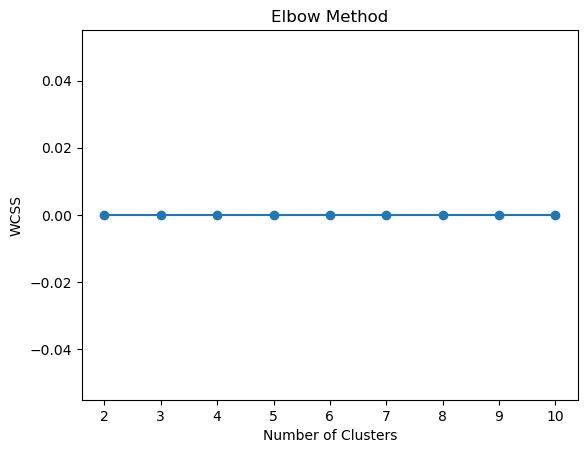

In [19]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.piecewise import SymbolicAggregateApproximation
import matplotlib.pyplot as plt

# Step 1: Scale the time series data
scaler = TimeSeriesScalerMinMax()
scaled_features_Train = scaler.fit_transform(data)

# Step 2: Apply Symbolic Aggregate Approximation (SAX)
sax = SymbolicAggregateApproximation(n_segments=10, alphabet_size_avg=5)
sax_data = sax.fit_transform(scaled_features_Train)

# Reshape sax_data to have 2 dimensions
sax_data = sax_data.reshape(sax_data.shape[0], -1)

# Step 3: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 11)
wcss_scores = []

for n_clusters in cluster_range:
    kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric='dtw', metric_params={"global_constraint": "sakoe_chiba", "sakoe_chiba_radius": 5})
    kmeans.fit(sax_data)
    
    # WCSS score: Compute the within-cluster sum of squares
    wcss_scores.append(np.sum(np.min(kmeans.transform(sax_data), axis=1)))

# Step 4: Plot the WCSS scores
plt.plot(cluster_range, wcss_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data pa

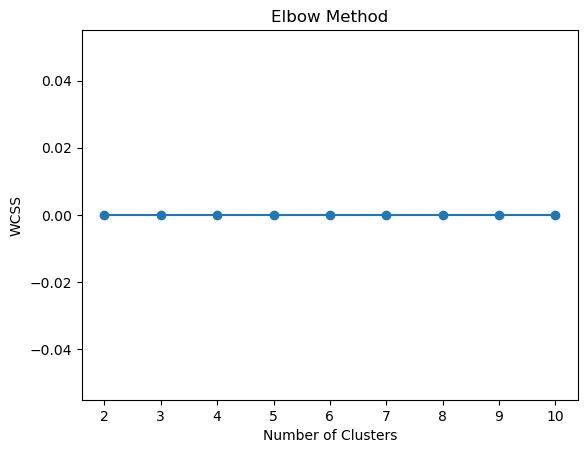

In [20]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.piecewise import SymbolicAggregateApproximation
import matplotlib.pyplot as plt

# # Step 1: Scale the time series data
# scaler = TimeSeriesScalerMinMax()
# scaled_features_Train = scaler.fit_transform(data)

# Step 2: Apply Symbolic Aggregate Approximation (SAX)
sax = SymbolicAggregateApproximation(n_segments=10, alphabet_size_avg=5)
sax_data = sax.fit_transform(scaled_features_Train)

# Reshape sax_data to have 2 dimensions
sax_data = sax_data.reshape(sax_data.shape[0], -1)

# Step 3: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 11)
wcss_scores = []

for n_clusters in cluster_range:
    kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric='dtw', metric_params={"global_constraint": "sakoe_chiba", "sakoe_chiba_radius": 5})
    kmeans.fit(sax_data)
    
    # WCSS score: Compute the within-cluster sum of squares
    wcss_scores.append(np.sum(np.min(kmeans.transform(sax_data), axis=1)))

# Step 4: Plot the WCSS scores
plt.plot(cluster_range, wcss_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [ ]:
# Step 5: Plot the elbow method results
elb_visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1, 11))
elb_visualizer.fit(scaled_features_2d_Train)
elb_visualizer.show()

# Step 6: Find the elbow point
elbow_point = elb_visualizer.elbow_value_

print("Elbow point based on the sum of squared distances:", elbow_point)


In [37]:
# Grid Search
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

# Step 4: Define the search space for hyperparameters
param_dist = {'n_clusters': range(2, 11),
              'metric': ['dtw', 'euclidean'],
              'metric_params': [{'global_constraint': 'sakoe_chiba', 'sakoe_chiba_radius': r} for r in range(1, 6)]}

# Step 5: Perform randomized search to find the best hyperparameters
kmeans = TimeSeriesKMeans()
scoring = make_scorer(silhouette_score)
rs = RandomizedSearchCV(kmeans, param_distributions=param_dist, n_iter=20, cv=5, scoring=scoring)
rs.fit(data)

# Step 6: Print the best hyperparameters and the corresponding silhouette score
print("Best hyperparameters:", rs.best_params_)
print("Best silhouette score:", rs.best_score_)

KeyboardInterrupt: 

In [ ]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

# Step 4: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 11)  # Set the range of cluster numbers to try
wcss_scores = []  # To store the within-cluster sum of squares (WCSS) for each cluster number
silhouette_scores = []  # To store the silhouette scores for each cluster number

for n_clusters in cluster_range:
    kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric='dtw', metric_params={"global_constraint": "sakoe_chiba", "sakoe_chiba_radius": 5})
    kmeans.fit(scaled_features)
    
    # WCSS score: Compute the within-cluster sum of squares
    wcss_scores.append(kmeans.inertia)
    
    # Silhouette score: Compute the average silhouette score
    if len(np.unique(kmeans.labels_)) > 1:
        silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Step 5: Find the best K value based on the silhouette score
best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# Step 6: Plot the WCSS scores using KElbowVisualizer
elb_visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 11))
elb_visualizer.fit(scaled_features)
elb_visualizer.show()

# Step 7: Get the elbow point
elbow_point = elb_visualizer.elbow_value_

print("Elbow point based on the sum of squared distances:", elbow_point)

In [10]:
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import numpy as np

# Step 4: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 11)  # Set the range of cluster numbers to try
silhouette_scores = []  # To store the silhouette scores for each cluster number

for n_clusters in cluster_range:
    kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric='dtw', metric_params={"global_constraint": "sakoe_chiba", "sakoe_chiba_radius": 5})
    kmeans.fit(data)
    
    # Silhouette score: Compute the average silhouette score
    if len(np.unique(kmeans.labels_)) > 1:
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

# Step 5: Find the best K value based on the silhouette score
best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# Step 6: Create and display the KElbowVisualizer
elb_visualizer = KElbowVisualizer(kmeans, k=(1, 11), metric='silhouette')
elb_visualizer.fit(data)
elb_visualizer.show()

print("Best K value based on the silhouette score:", best_k)


: 

: 

In [37]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import numpy as np

# Step 1: Load the dataset
data = np.load('RavdessAudioOnlyNumpy__X_train.npy')

# Step 2: Preprocess the time series data
scaler = TimeSeriesScalerMinMax()
scaled_data = scaler.fit_transform(data)

# Step 3: Apply PAA for dimensionality reduction
n_segments = 100  # Set the number of segments for PAA
paa = PiecewiseAggregateApproximation(n_segments=n_segments)
paa_data = paa.fit_transform(scaled_data)

# Step 4: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 11)  # Set the range of cluster numbers to try
silhouette_scores = []  # To store the silhouette scores for each cluster number

for n_clusters in cluster_range:
    kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric='dtw', metric_params={"global_constraint": "sakoe_chiba", "sakoe_chiba_radius": 5})
    kmeans.fit(paa_data)
    
    # Silhouette score: Compute the average silhouette score
    if len(np.unique(kmeans.labels_)) > 1:
        silhouette_scores.append(silhouette_score(paa_data, kmeans.labels_))

# Step 5: Find the best K value based on the silhouette score
best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# Step 6: Create and display the KElbowVisualizer
elb_visualizer = KElbowVisualizer(kmeans, k=(1, 11))
elb_visualizer.fit(paa_data)
elb_visualizer.show()

print("Best K value based on the silhouette score:", best_k)


ValueError: Found array with dim 3. Estimator expected <= 2.

In [4]:
pip install saxpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.0/179.0 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 kB 7.8 MB/s eta 0:00:00
  Created wheel for saxpy: filename=saxpy-1.0.1.dev167-py3-none-any.whl size=17690 sha256=5a213bb23be7ad390a9706489ff377a842bc0ad9564d1fa7de52ae8fe91bf793
  Stored in directory: /Users/arafathjazeeb/Library/Caches/pip/wheels/74/ae/1d/241804ea29dfeb6877597dbe21ae7a82774e86361f21b07ed0
Successfully built saxpy
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pyts

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import pyts
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from itertools import product
from pyts.approximation import SymbolicAggregateApproximation

# Step 1: Load the dataset
data = np.load('RavdessAudioOnlyNumpy__X_train.npy')

# Load the CSV file containing the labels
labels_df = pd.read_csv('RavdessAudioOnlyNumpy__Y_train.csv')
labels_df.drop("filename", axis=1, inplace=True)

# Extract the labels
labels = labels_df.values

# Step 2: Preprocess the time series data
scaler = TimeSeriesScalerMinMax()
scaled_data = scaler.fit_transform(data)

# Define the parameter values to try
n_segments_range = [5, 10, 15]  # Number of segments for Piecewise Aggregate Approximation (PAA)
word_size_range = [4, 8, 12]  # Word size for SAX
alphabet_size_range = [3, 4, 5]  # Alphabet size for SAX

# Store the best parameters and corresponding silhouette score
best_params = None
best_silhouette = -1

# Step 3: Iterate over parameter combinations
for n_segments, word_size, alphabet_size in product(n_segments_range, word_size_range, alphabet_size_range):
    # Apply PAA to reduce the dimensionality
    paa = PiecewiseAggregateApproximation(n_segments=n_segments)
    paa_data = paa.fit_transform(scaled_data)

    # Apply SAX for approximation
    # Apply SAX for approximation
    sax = pyts.approximation.SymbolicAggregateApproximation(word_size=word_size, alphabet_size=alphabet_size)
    sax_data = sax.transform(paa_data)

    # Step 4: Perform k-means clustering with different numbers of clusters
    cluster_range = range(2, 11)  # Set the range of cluster numbers to try
    silhouette_scores = []  # To store the silhouette scores for each cluster number

    for n_clusters in cluster_range:
        kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric='dtw', metric_params={"global_constraint": "sakoe_chiba", "sakoe_chiba_radius": 5})
        kmeans.fit(sax_data)

        # Silhouette score: Compute the average silhouette score
        if len(np.unique(kmeans.labels_)) > 1:
            silhouette_scores.append(silhouette_score(sax_data, kmeans.labels_))

    # Step 5: Find the best K value based on the silhouette score
    best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]

    # Update the best parameters if the current silhouette score is higher
    if max(silhouette_scores) > best_silhouette:
        best_params = (n_segments, word_size, alphabet_size)
        best_silhouette = max(silhouette_scores)

# Perform k-means clustering with the best parameters outside the loop
n_segments, word_size, alphabet_size = best_params

# Apply PAA to reduce the dimensionality
paa = PiecewiseAggregateApproximation(n_segments=n_segments)
paa_data = paa.fit_transform(scaled_data)

# Apply SAX for approximation
sax = SymbolicAggregateApproximation(word_size=word_size, alphabet_size=alphabet_size)
sax_data = sax.transform(paa_data)

# Perform k-means clustering with the best number of clusters
kmeans = TimeSeriesKMeans(n_clusters=best_k, metric='dtw', metric_params={"global_constraint": "sakoe_chiba", "sakoe_chiba_radius": 5})
kmeans.fit(sax_data)

# Visualize the clustering results
elb_visualizer = KElbowVisualizer(kmeans, k=(1, 11), metric='silhouette')
elb_visualizer.fit(sax_data)
elb_visualizer.show()

# Print the best parameters and best K value
print("Best parameters:", best_params)
print("Best K value based on the silhouette score:", best_k)



TypeError: __init__() got an unexpected keyword argument 'word_size'

In [ ]:
print("Best parameters for PAA:")
print("Number of segments:", n_segments)

print("Best parameters for SAX:")
print("Word size:", word_size)
print("Alphabet size:", alphabet_size)

In [23]:
import numpy as np
import pandas as pd
from pyts.approximation import SymbolicAggregateApproximation
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from itertools import product

# Step 1: Load the dataset
data = np.load('RavdessAudioOnlyNumpy__X_train.npy')

# Load the CSV file containing the labels
labels_df = pd.read_csv('RavdessAudioOnlyNumpy__Y_train.csv')
labels_df.drop("filename", axis=1, inplace=True)

# Extract the labels
labels = labels_df.values

# Step 2: Preprocess the time series data
scaler = TimeSeriesScalerMinMax()
scaled_data = scaler.fit_transform(data)

# Define the parameter values to try
n_segments_range = [5, 10, 15]  # Number of segments for Piecewise Aggregate Approximation (PAA)
word_size_range = [4, 8, 12]  # Word size for SAX
alphabet_size_range = [3, 4, 5]  # Alphabet size for SAX

# Store the best parameters and corresponding silhouette score
best_params = None
best_silhouette = -1

# Step 3: Iterate over parameter combinations
for n_segments, word_size, alphabet_size in product(n_segments_range, word_size_range, alphabet_size_range):
    # Apply PAA to reduce the dimensionality
    paa = PiecewiseAggregateApproximation(n_segments=n_segments)
    paa_data = paa.fit_transform(scaled_data)

    # Apply SAX for approximation
    sax = SymbolicAggregateApproximation(n_bins=alphabet_size, strategy='uniform')
    sax_data = sax.transform(paa_data)

    # Step 4: Perform k-means clustering with different numbers of clusters
    cluster_range = range(2, 11)  # Set the range of cluster numbers to try
    silhouette_scores = []  # To store the silhouette scores for each cluster number

    for n_clusters in cluster_range:
        kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric='dtw', metric_params={"global_constraint": "sakoe_chiba", "sakoe_chiba_radius": 5})
        kmeans.fit(sax_data)

        # Silhouette score: Compute the average silhouette score
        if len(np.unique(kmeans.labels_)) > 1:
            silhouette_scores.append(silhouette_score(sax_data, kmeans.labels_))

    # Step 5: Find the best K value based on the silhouette score
    best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]

    # Update the best parameters if the current silhouette score is higher
    if max(silhouette_scores) > best_silhouette:
        best_params = (n_segments, word_size, alphabet_size)
        best_silhouette = max(silhouette_scores)

# Perform k-means clustering with the best parameters outside the loop
n_segments, word_size, alphabet_size = best_params

# Apply PAA to reduce the dimensionality
paa = PiecewiseAggregateApproximation(n_segments=n_segments)
paa_data = paa.fit_transform(scaled_data)

# Apply SAX for approximation
sax = SymbolicAggregateApproximation(n_bins=alphabet_size, strategy='uniform')
sax_data = sax.transform(paa_data)

# Perform k-means clustering with the best number of clusters
kmeans = TimeSeriesKMeans(n_clusters=best_k, metric='dtw', metric_params={"global_constraint": "sakoe_chiba", "sakoe_chiba_radius": 5})
kmeans.fit(sax_data)

# Visualize the clustering results
elb_visualizer = KElbowVisualizer(kmeans, k=(1, 11), metric='silhouette')
elb_visualizer.fit(sax_data)
elb_visualizer.show()

# Print the best parameters and best K value
print("Best parameters:", best_params)
print("Best K value based on the silhouette score:", best_k)


ValueError: Found array with dim 3. Estimator expected <= 2.

# Additional Testing

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
# from kneed import KneeLocator

# # Reshape the scaled_features array
# scaled_features_2d = scaled_features.reshape(scaled_features.shape[0], -1)

# # Step 4: Perform k-means clustering with different numbers of clusters
# cluster_range = range(2, 11)  # Set the range of cluster numbers to try
# elbow_scores = []  # To store the sum of squared distances (inertia) for each cluster number
# silhouette_scores = []  # To store the silhouette scores for each cluster number

# for n_clusters in cluster_range:
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     kmeans.fit(scaled_features_2d)
    
#     # Elbow method: Compute the sum of squared distances
#     elbow_scores.append(kmeans.inertia_)
    
#     # Silhouette score: Compute the average silhouette score
#     if len(np.unique(kmeans.labels_)) > 1:
#         silhouette_scores.append(silhouette_score(scaled_features_2d, kmeans.labels_))

# # Step 5: Find the best K value based on the silhouette score
# best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# # Step 6: Plot the elbow method results
# elb_visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1, 11))
# elb_visualizer.fit(scaled_features_2d)
# elb_visualizer.show()

# # Step 7: Plot the silhouette scores
# if silhouette_scores:
#     sil_visualizer = SilhouetteVisualizer(KMeans(n_clusters=best_k, random_state=42))
#     sil_visualizer.fit(scaled_features_2d)
#     sil_visualizer.show()

# # Step 8: Find the elbow point
# kl = KneeLocator(cluster_range, elbow_scores, curve='convex', direction='decreasing')
# elbow_point = kl.elbow

# print("Best K value based on the silhouette score:", best_k)
# print("Elbow point based on the sum of squared distances:", elbow_point)

In [ ]:
import numpy as np

# Extract the labels
labels = labels_df.values

# Convert labels to string data type
labels = labels.astype(str)

# Reshape the scaled_features array
scaled_features_2d = scaled_features.reshape(scaled_features.shape[0], -1)

# Perform k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features_2d)
cluster_labels = kmeans.labels_

# Create a dictionary to store the count of values in each class for each cluster
cluster_class_counts = {cluster: {} for cluster in range(num_clusters)}

# Count the values in each class for each cluster
for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    cluster_labels_subset = labels[cluster_indices]
    unique_classes, class_counts = np.unique(cluster_labels_subset, return_counts=True)

    # Sort the unique_classes and class_counts together using numpy.lexsort
    sort_indices = np.lexsort((class_counts, unique_classes))
    unique_classes_sorted = unique_classes[sort_indices]
    class_counts_sorted = class_counts[sort_indices]

    cluster_class_counts[cluster] = dict(zip(unique_classes_sorted, class_counts_sorted))

# Create a table to display the count of values in each class for each cluster
table_data = {}
for cluster, class_counts in cluster_class_counts.items():
    cluster_name = f"Cluster {cluster+1}"
    table_data[cluster_name] = class_counts

table = pd.DataFrame(table_data)
table.index.name = "Clusters"
table = table.fillna(0).astype(int)

# Transpose the table
transposed_table = table.transpose()

# Print only the specified class labels from the table
class_labels = ["angry", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"]
transposed_table[class_labels]

In [127]:
# Create a table to display the count of values in each class for each cluster
table_data = {}
for cluster, class_counts in cluster_class_counts.items():
    cluster_name = f"Cluster {cluster+1}"
    table_data[cluster_name] = class_counts

table = pd.DataFrame(table_data)
table.index.name = "Clusters"
table = table.fillna(0).astype(int)

# Display the table
# print(table)

In [128]:
# Transpose the table
transposed_table = table.transpose()

# Print the transposed table
# transposed_table

In [129]:
# Print only the specified class labels from the table
class_labels = ["angry", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"]
transposed_table[class_labels]

Clusters,angry,calm,disgust,fearful,happy,neutral,sad,surprised
Cluster 1,4,19,2,6,10,9,15,6
Cluster 2,52,12,6,25,26,2,12,4
Cluster 3,24,31,29,42,39,20,37,19
Cluster 4,16,35,13,25,23,18,34,19


In [110]:
# import numpy as np
# import librosa
# from sklearn.preprocessing import LabelEncoder

# # Step 2: Preprocess the audio data (if necessary)

# # Step 3: Extract audio features
# def extract_features(audio, sr):
#     # Extract MFCC features
#     mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    
#     # Extract chroma features
#     chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    
#     # Extract spectral contrast features
#     contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    
#     # Extract tonnetz features
#     tonnetz = librosa.feature.tonnetz(y=audio, sr=sr)
    
#     # Extract zero-crossing rate
#     zero_crossing = librosa.feature.zero_crossing_rate(y=audio)
    
#     # Extract pitch features
#     pitch, _ = librosa.piptrack(y=audio, sr=sr)
    
#     return mfcc, chroma, contrast, tonnetz, zero_crossing, pitch

# # Step 4: Statistical features
# def compute_statistics(features):
#     mean_features = np.mean(features, axis=1)
#     std_features = np.std(features, axis=1)
#     median_features = np.median(features, axis=1)
    
#     return mean_features, std_features, median_features

# # Step 8: Feature scaling and normalization
# def scale_features(features):
#     # Perform feature scaling or normalization
#     # Add your code here
    
#     return scaled_features

# # Step 9: Label encoding
# def encode_labels(labels):
#     encoder = LabelEncoder()
#     encoded_labels = encoder.fit_transform(labels)
    
#     return encoded_labels

# # Step 10: Store the extracted features
# def store_features(features, labels):
#     np.save('extracted_features.npy', features)
#     np.save('encoded_labels.npy', labels)

# # Iterate over the dataset
# all_features = []
# for audio, label in zip(data, labels):
#     # Step 2: Preprocess the audio data (if necessary)
    
#     # Step 3: Set the sample rate value
#     sr = 22050
    
#     # Step 3: Extract audio features
#     mfcc, chroma, contrast, tonnetz, zero_crossing, pitch = extract_features(audio, sr)
    
#     # Step 4: Statistical features
#     mfcc_stats = compute_statistics(mfcc)
#     chroma_stats = compute_statistics(chroma)
#     contrast_stats = compute_statistics(contrast)
#     tonnetz_stats = compute_statistics(tonnetz)
#     zero_crossing_stats = compute_statistics(zero_crossing)
#     pitch_stats = compute_statistics(pitch)
    
#     # Combine all features
#     features = np.concatenate((mfcc_stats[0], chroma_stats[0], contrast_stats[0], tonnetz_stats[0],
#                                zero_crossing_stats[0], pitch_stats[0]), axis=0)
    
#     # Combine all statistics
#     statistics = np.concatenate((mfcc_stats[1:], chroma_stats[1:], contrast_stats[1:], tonnetz_stats[1:],
#                                  zero_crossing_stats[1:], pitch_stats[1:]), axis=0)
    
#     # Pad the statistics with zeros to match the dimensions
#     max_length = max(stat.shape[1] for stat in statistics)
#     statistics_padded = []
#     for stat in statistics:
#         diff = max_length - stat.shape[1]
#         padded_stat = np.pad(stat, ((0, 0), (0, diff)), mode='constant')
#         statistics_padded.append(padded_stat)
#     statistics_padded = np.concatenate(statistics_padded, axis=0)
    
#     # Combine features and statistics
#     all_features = np.concatenate((features, statistics_padded), axis=0)
    
#     # Step 8: Feature scaling and normalization
#     scaled_features = scale_features(all_features)
    
#     all_features.append(scaled_features)

# # Convert the list of features into a numpy array
# all_features = np.array(all_features)

# # Step 9: Label encoding
# encoded_labels = encode_labels(labels)

# # Step 10: Store the extracted features
# store_features(all_features, encoded_labels)


In [111]:
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder

# Step 2: Preprocess the audio data (if necessary)

# Step 3: Extract audio features
def extract_features(audio, sr):
    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    
    # Extract chroma features
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    
    # Extract spectral contrast features
    contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    
    # Extract tonnetz features
    tonnetz = librosa.feature.tonnetz(y=audio, sr=sr)
    
    # Extract zero-crossing rate
    zero_crossing = librosa.feature.zero_crossing_rate(y=audio)
    
    # Extract pitch features
    pitch, _ = librosa.piptrack(y=audio, sr=sr)
    
    return mfcc, chroma, contrast, tonnetz, zero_crossing, pitch

# Step 4: Statistical features
def compute_statistics(features):
    mean_features = np.mean(features, axis=1)
    std_features = np.std(features, axis=1)
    median_features = np.median(features, axis=1)
    
    return mean_features, std_features, median_features

# Step 8: Feature scaling and normalization
def scale_features(features):
    # Perform feature scaling or normalization
    # Add your code here
    
    return scaled_features

# Step 9: Label encoding
def encode_labels(labels):
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(labels)
    
    return encoded_labels

# Step 10: Store the extracted features
def store_features(features, labels):
    np.save('extracted_features.npy', features)
    np.save('encoded_labels.npy', labels)

# Iterate over the dataset
all_features = []
for audio, label in zip(data, labels):
    # Step 2: Preprocess the audio data (if necessary)
    
    # Step 3: Set the sample rate value
    sr = 22050
    
    # Step 3: Extract audio features
    mfcc, chroma, contrast, tonnetz, zero_crossing, pitch = extract_features(audio, sr)
    
    # Step 4: Statistical features
    mfcc_stats = compute_statistics(mfcc)
    chroma_stats = compute_statistics(chroma)
    contrast_stats = compute_statistics(contrast)
    tonnetz_stats = compute_statistics(tonnetz)
    zero_crossing_stats = compute_statistics(zero_crossing)
    pitch_stats = compute_statistics(pitch)
    
    # Combine all features
    features = np.concatenate((mfcc_stats[0], chroma_stats[0][:12], contrast_stats[0], tonnetz_stats[0],
                               zero_crossing_stats[0], pitch_stats[0]), axis=0)
    
    statistics = np.concatenate((mfcc_stats[1], chroma_stats[1], contrast_stats[1], tonnetz_stats[1],
                             zero_crossing_stats[1], pitch_stats[1]), axis=0)



    
    # Combine features and statistics
    all_features.append(np.concatenate((features, statistics), axis=0))

# Convert the list of features into a numpy array
all_features = np.array(all_features)

# Step 8: Feature scaling and normalization
scaled_features = scale_features(all_features)

# Step 9: Label encoding
encoded_labels = encode_labels(labels)

# Step 10: Store the extracted features
store_features(scaled_features, encoded_labels)


KeyboardInterrupt: 

In [ ]:
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder

# Step 2: Preprocess the audio data (if necessary)

# Step 3: Extract audio features
def extract_features(audio, sr):
    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    
    # Extract chroma features
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    
    # Extract spectral contrast features
    contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    
    # Extract tonnetz features
    tonnetz = librosa.feature.tonnetz(y=audio, sr=sr)
    
    # Extract zero-crossing rate
    zero_crossing = librosa.feature.zero_crossing_rate(y=audio)
    
    # Extract pitch features
    pitch, _ = librosa.piptrack(y=audio, sr=sr)
    
    return mfcc, chroma, contrast, tonnetz, zero_crossing, pitch

# Step 4: Statistical features
def compute_statistics(features):
    mean_features = np.mean(features, axis=1)
    std_features = np.std(features, axis=1)
    median_features = np.median(features, axis=1)
    
    return mean_features, std_features, median_features

# Step 8: Feature scaling and normalization
def scale_features(features):
    # Perform feature scaling or normalization
    # Add your code here
    scaled_features = features  # Placeholder, replace with actual scaling logic
    
    return scaled_features

# Step 9: Label encoding
def encode_labels(labels):
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(labels)
    
    return encoded_labels

# Step 10: Store the extracted features
def store_features(features, labels):
    np.save('extracted_features.npy', features)
    np.save('encoded_labels.npy', labels)

# Iterate over the dataset
all_features = []
for audio, label in zip(data, labels):
    # Step 2: Preprocess the audio data (if necessary)
    
    # Step 3: Set the sample rate value
    sr = 22050
    
    # Step 3: Extract audio features
    mfcc, chroma, contrast, tonnetz, zero_crossing, pitch = extract_features(audio, sr)
    
    # Step 4: Statistical features
    mfcc_stats = compute_statistics(mfcc)
    chroma_stats = compute_statistics(chroma)
    contrast_stats = compute_statistics(contrast)
    tonnetz_stats = compute_statistics(tonnetz)
    zero_crossing_stats = compute_statistics(zero_crossing)
    pitch_stats = compute_statistics(pitch)
    
    # Combine all features
    features = np.concatenate((mfcc_stats[0], chroma_stats[0][:12], contrast_stats[0], tonnetz_stats[0],
                               zero_crossing_stats[0], pitch_stats[0]), axis=0)
    
    statistics = np.concatenate((mfcc_stats[1], chroma_stats[1], contrast_stats[1], tonnetz_stats[1],
                             zero_crossing_stats[1], pitch_stats[1]), axis=0)

    # Combine features and statistics
    all_features.append(np.concatenate((features, statistics), axis=0))

# Convert the list of features into a numpy array
all_features = np.array(all_features)

# Step 8: Feature scaling and normalization
scaled_features = scale_features(all_features)

# Step 9: Label encoding
encoded_labels = encode_labels(labels)

# Step 10: Store the extracted features
store_features(scaled_features, encoded_labels)


ValueError: y should be a 1d array, got an array of shape (634, 9) instead.

In [ ]:
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder

# Step 2: Preprocess the audio data (if necessary)

# Step 3: Extract audio features
def extract_features(audio, sr):
    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    
    # Extract chroma features
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    
    # Extract spectral contrast features
    contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    
    # Extract tonnetz features
    tonnetz = librosa.feature.tonnetz(y=audio, sr=sr)
    
    # Extract zero-crossing rate
    zero_crossing = librosa.feature.zero_crossing_rate(y=audio)
    
    # Extract pitch features
    pitch, _ = librosa.piptrack(y=audio, sr=sr)
    
    return mfcc, chroma, contrast, tonnetz, zero_crossing, pitch

# Step 4: Statistical features
def compute_statistics(features):
    mean_features = np.mean(features, axis=1)
    std_features = np.std(features, axis=1)
    median_features = np.median(features, axis=1)
    
    return mean_features, std_features, median_features

# Step 8: Feature scaling and normalization
def scale_features(features):
    # Perform feature scaling or normalization
    # Add your code here
    scaled_features = features  # Placeholder, replace with actual scaling logic
    
    return scaled_features

def encode_labels(labels):
    unique_labels = np.unique(labels)
    label_dict = {label: idx for idx, label in enumerate(unique_labels)}
    encoded_labels = np.array([label_dict[str(label)] for label in labels])
    
    return encoded_labels




# Step 10: Store the extracted features
def store_features(features, labels):
    np.save('extracted_features.npy', features)
    np.save('encoded_labels.npy', labels)

# Iterate over the dataset
all_features = []
for audio, label in zip(data, labels):
    # Step 2: Preprocess the audio data (if necessary)
    
    # Step 3: Set the sample rate value
    sr = 22050
    
    # Step 3: Extract audio features
    mfcc, chroma, contrast, tonnetz, zero_crossing, pitch = extract_features(audio, sr)
    
    # Step 4: Statistical features
    mfcc_stats = compute_statistics(mfcc)
    chroma_stats = compute_statistics(chroma)
    contrast_stats = compute_statistics(contrast)
    tonnetz_stats = compute_statistics(tonnetz)
    zero_crossing_stats = compute_statistics(zero_crossing)
    pitch_stats = compute_statistics(pitch)
    
    # Combine all features
    features = np.concatenate((mfcc_stats[0], chroma_stats[0][:12], contrast_stats[0], tonnetz_stats[0],
                               zero_crossing_stats[0], pitch_stats[0]), axis=0)
    
    statistics = np.concatenate((mfcc_stats[1], chroma_stats[1], contrast_stats[1], tonnetz_stats[1],
                             zero_crossing_stats[1], pitch_stats[1]), axis=0)
    
    # Combine features and statistics
    all_features.append(np.concatenate((features, statistics), axis=0))

# Convert the list of features into a numpy array
all_features = np.array(all_features)

# Step 8: Feature scaling and normalization
scaled_features = scale_features(all_features)

# Step 9: Label encoding
encoded_labels = encode_labels(labels)

# Step 10: Store the extracted features
store_features(scaled_features, encoded_labels)


TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 1.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder
from tslearn.preprocessing import TimeSeriesScalerMinMax

# Step 2: Preprocess the audio data (if necessary)

# Step 3: Extract audio features
def extract_features(audio, sr):
    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    
    # Extract chroma features
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    
    # Extract spectral contrast features
    contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    
    # Extract tonnetz features
    tonnetz = librosa.feature.tonnetz(y=audio, sr=sr)
    
    # Extract zero-crossing rate
    zero_crossing = librosa.feature.zero_crossing_rate(y=audio)
    
    # Extract pitch features
    pitch, _ = librosa.piptrack(y=audio, sr=sr)
    
    return mfcc, chroma, contrast, tonnetz, zero_crossing, pitch

# Step 4: Statistical features
def compute_statistics(features):
    mean_features = np.mean(features, axis=1)
    std_features = np.std(features, axis=1)
    median_features = np.median(features, axis=1)
    
    return mean_features, std_features, median_features

# Step 8: Feature scaling and normalization
# Step 8: Feature scaling and normalization
def scale_features(features):
    scaler = TimeSeriesScalerMinMax()
    scaled_features = scaler.fit_transform(features)
    return scaled_features

# Step 9: Label encoding
# Step 9: Label encoding
def encode_labels(labels):
    flattened_labels = labels.ravel()  # Flatten the labels array
    flattened_labels = flattened_labels.astype(str)  # Convert labels to strings
    
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(flattened_labels)

    return encoded_labels


# Step 10: Store the extracted features
def store_features(features, labels):
    np.save('extracted_features.npy', features)
    np.save('encoded_labels.npy', labels)

# Iterate over the dataset
all_features = []
for audio, label in zip(data, labels):
    # Step 2: Preprocess the audio data (if necessary)
    
    # Step 3: Set the sample rate value
    sr = 22050
    
    # Step 3: Extract audio features
    mfcc, chroma, contrast, tonnetz, zero_crossing, pitch = extract_features(audio, sr)
    
    # Step 4: Statistical features
    mfcc_stats = compute_statistics(mfcc)
    chroma_stats = compute_statistics(chroma)
    contrast_stats = compute_statistics(contrast)
    tonnetz_stats = compute_statistics(tonnetz)
    zero_crossing_stats = compute_statistics(zero_crossing)
    pitch_stats = compute_statistics(pitch)
    
    # Combine all features
    features = np.concatenate((mfcc_stats[0], chroma_stats[0][:12], contrast_stats[0], tonnetz_stats[0],
                               zero_crossing_stats[0], pitch_stats[0]), axis=0)
    
    statistics = np.concatenate((mfcc_stats[1], chroma_stats[1], contrast_stats[1], tonnetz_stats[1],
                             zero_crossing_stats[1], pitch_stats[1]), axis=0)
    
    # Combine features and statistics
    all_features.append(np.concatenate((features, statistics), axis=0))

# Convert the list of features into a numpy array
all_features = np.array(all_features)

# Step 8: Feature scaling and normalization
scaled_features = scale_features(all_features)

# Step 9: Label encoding
encoded_labels = encode_labels(labels)

# Step 10: Store the extracted features
store_features(scaled_features, encoded_labels)


In [ ]:
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder
from tslearn.preprocessing import TimeSeriesScalerMinMax

# Step 2: Preprocess the audio data (if necessary)

# Step 3: Extract audio features
def extract_features(audio, sr):
    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    
    # Extract chroma features
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    
    # Extract spectral contrast features
    contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    
    # Extract tonnetz features
    tonnetz = librosa.feature.tonnetz(y=audio, sr=sr)
    
    # Extract zero-crossing rate
    zero_crossing = librosa.feature.zero_crossing_rate(y=audio)
    
    # Extract pitch features
    pitch, _ = librosa.piptrack(y=audio, sr=sr)
    
    return mfcc, chroma, contrast, tonnetz, zero_crossing, pitch

# Step 4: Statistical features
def compute_statistics(features):
    mean_features = np.mean(features, axis=1)
    std_features = np.std(features, axis=1)
    median_features = np.median(features, axis=1)
    
    return mean_features, std_features, median_features

# Step 8: Feature scaling and normalization
# Step 8: Feature scaling and normalization
def scale_features(features):
    scaler = TimeSeriesScalerMinMax()
    scaled_features = scaler.fit_transform(features)
    return scaled_features

# Step 9: Label encoding
# Step 9: Label encoding
def encode_labels(labels):
    flattened_labels = labels.ravel()  # Flatten the labels array
    flattened_labels = flattened_labels.astype(str)  # Convert labels to strings
    
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(flattened_labels)

    return encoded_labels


# Step 10: Store the extracted features
def store_features(features, labels):
    np.save('extracted_features.npy', features)
    np.save('encoded_labels.npy', labels)

# Iterate over the dataset
all_features = []
for audio, label in zip(data, labels):
    # Step 2: Preprocess the audio data (if necessary)
    
    # Step 3: Set the sample rate value
    sr = 22050
    
    # Step 3: Extract audio features
    mfcc, chroma, contrast, tonnetz, zero_crossing, pitch = extract_features(audio, sr)
    
    # Step 4: Statistical features
    mfcc_stats = compute_statistics(mfcc)
    chroma_stats = compute_statistics(chroma)
    contrast_stats = compute_statistics(contrast)
    tonnetz_stats = compute_statistics(tonnetz)
    zero_crossing_stats = compute_statistics(zero_crossing)
    pitch_stats = compute_statistics(pitch)
    
    # Combine all features
    features = np.concatenate((mfcc_stats[0], chroma_stats[0][:12], contrast_stats[0], tonnetz_stats[0],
                               zero_crossing_stats[0], pitch_stats[0]), axis=0)
    
    statistics = np.concatenate((mfcc_stats[1], chroma_stats[1], contrast_stats[1], tonnetz_stats[1],
                             zero_crossing_stats[1], pitch_stats[1]), axis=0)
    
    # Combine features and statistics
    all_features.append(np.concatenate((features, statistics), axis=0))

# Convert the list of features into a numpy array
all_features = np.array(all_features)

# Step 8: Feature scaling and normalization
scaled_features = scale_features(all_features)

# Step 9: Label encoding
encoded_labels = encode_labels(labels)

# Step 10: Store the extracted features
store_features(scaled_features, encoded_labels)


# Step 11: Save the features as a file
np.save('all_features.npy', scaled_features)
np.save('encoded_labels.npy', encoded_labels)


In [ ]:
print(scale_features)

<function scale_features at 0x7fd9589670d0>


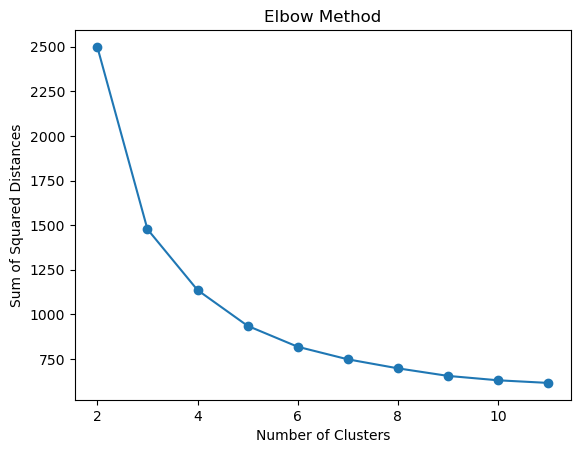

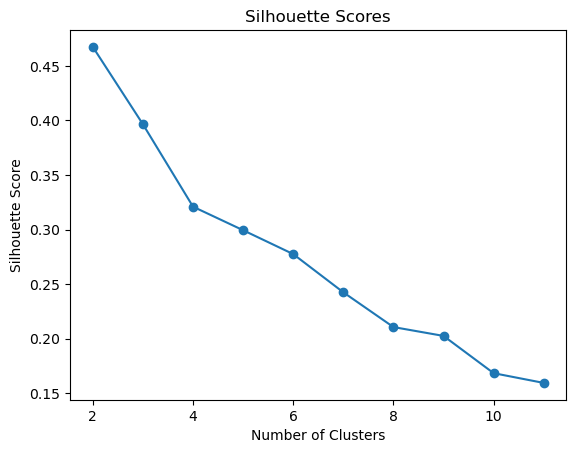

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Reshape the scaled_features array
scaled_features_2d = scaled_features.reshape(scaled_features.shape[0], -1)

# Step 4: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 12)  # Set the range of cluster numbers to try
elbow_scores = []  # To store the sum of squared distances (inertia) for each cluster number
silhouette_scores = []  # To store the silhouette scores for each cluster number

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features_2d)
    
    # Elbow method: Compute the sum of squared distances
    elbow_scores.append(kmeans.inertia_)
    
    # Silhouette score: Compute the average silhouette score
    if len(np.unique(kmeans.labels_)) > 1:
        silhouette_scores.append(silhouette_score(scaled_features_2d, kmeans.labels_))

# Step 5: Plot the elbow method results
plt.plot(cluster_range, elbow_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

# Step 6: Plot the silhouette scores
if silhouette_scores:
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores')
    plt.show()


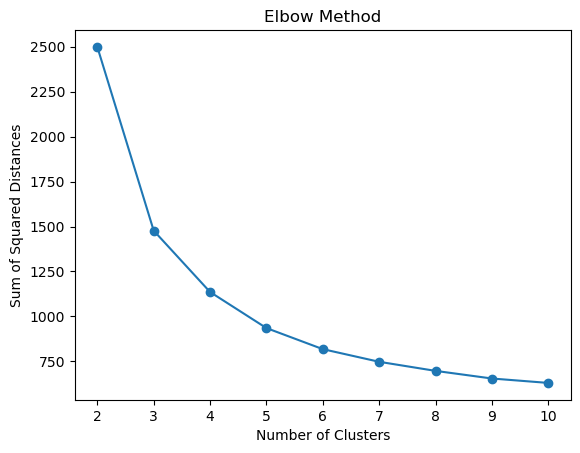

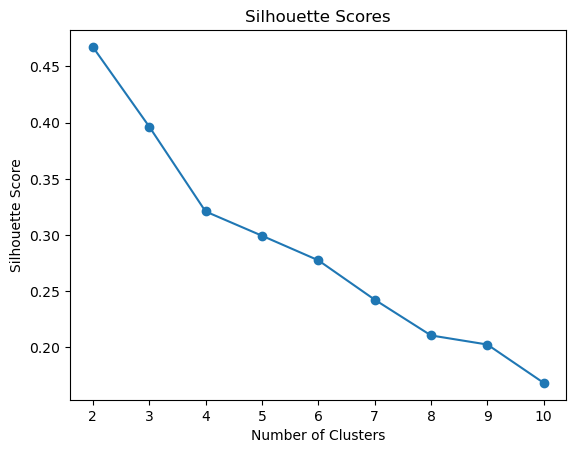

Best K value based on the elbow method: 2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Reshape the scaled_features array
scaled_features_2d = scaled_features.reshape(scaled_features.shape[0], -1)

# Step 4: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 11)  # Set the range of cluster numbers to try
elbow_scores = []  # To store the sum of squared distances (inertia) for each cluster number
silhouette_scores = []  # To store the silhouette scores for each cluster number

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features_2d)
    
    # Elbow method: Compute the sum of squared distances
    elbow_scores.append(kmeans.inertia_)
    
    # Silhouette score: Compute the average silhouette score
    if len(np.unique(kmeans.labels_)) > 1:
        silhouette_scores.append(silhouette_score(scaled_features_2d, kmeans.labels_))

# Step 5: Find the best K value based on the silhouette score
best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# Step 6: Plot the elbow method results
plt.plot(cluster_range, elbow_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

# Step 7: Plot the silhouette scores
if silhouette_scores:
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores')
    plt.show()

print("Best K value based on the elbow method:", best_k)


In [ ]:
# Reshape the scaled_features array
scaled_features_2d = scaled_features.reshape(scaled_features.shape[0], -1)

# Step 7: Choose the number of clusters based on the plots or other criteria
num_clusters = 4

# Step 8: Perform k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features_2d)
cluster_labels = kmeans.labels_

# Step 9: Analyze the cluster results
cluster_distribution = np.zeros((num_clusters, len(cluster_labels)))  

for i, label in enumerate(cluster_labels):
    cluster_distribution[label, i] = 1

# Step 10: Display the distribution of samples among clusters
print("Distribution of samples among clusters:")
print(cluster_distribution)

Distribution of samples among clusters:
[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [ ]:
# Extract the labels
labels = labels_df.values

# Reshape the scaled_features array
scaled_features_2d = scaled_features.reshape(scaled_features.shape[0], -1)

# Perform k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features_2d)
cluster_labels = kmeans.labels_

# Analyze the cluster results
cluster_distribution = [[] for _ in range(num_clusters)]

for i, label in enumerate(cluster_labels):
    cluster_distribution[label].append(labels[i])

# Display the distribution of labels among clusters
print("Distribution of labels among clusters:")
for i, cluster_labels in enumerate(cluster_distribution):
    print(f"Cluster {i+1}: {cluster_labels}")


Distribution of labels among clusters:
Cluster 1: [array(['audio-only', 'speech', 'neutral', 'normal',
       'Kids are talking by the door', '1st', 19, 'M',
       '03-01-01-01-01-01-19.wav'], dtype=object), array(['audio-only', 'speech', 'neutral', 'normal',
       'Kids are talking by the door', '2nd', 19, 'M',
       '03-01-01-01-01-02-19.wav'], dtype=object), array(['audio-only', 'speech', 'neutral', 'normal',
       'Dogs are sitting by the door', '1st', 19, 'M',
       '03-01-01-01-02-01-19.wav'], dtype=object), array(['audio-only', 'speech', 'neutral', 'normal',
       'Dogs are sitting by the door', '2nd', 19, 'M',
       '03-01-01-01-02-02-19.wav'], dtype=object), array(['audio-only', 'speech', 'calm', 'normal',
       'Kids are talking by the door', '1st', 19, 'M',
       '03-01-02-01-01-01-19.wav'], dtype=object), array(['audio-only', 'speech', 'calm', 'normal',
       'Kids are talking by the door', '2nd', 19, 'M',
       '03-01-02-01-01-02-19.wav'], dtype=object), array([

In [ ]:
from collections import Counter

# Extract the labels
labels = labels_df.values

# Reshape the scaled_features array
scaled_features_2d = scaled_features.reshape(scaled_features.shape[0], -1)

# Perform k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features_2d)
cluster_labels = kmeans.labels_

# Create an empty dictionary to store the class counts for each cluster
cluster_class_counts = {i: Counter() for i in range(num_clusters)}

# Count the class occurrences within each cluster
for i, label in enumerate(cluster_labels):
    cluster_class_counts[label].update([tuple(labels[i])])

# Display the class counts for each cluster
print("Class counts for each cluster:")
for cluster, class_counts in cluster_class_counts.items():
    print(f"Cluster {cluster+1}: {class_counts}")


Class counts for each cluster:
Cluster 1: Counter({('audio-only', 'speech', 'neutral', 'normal', 'Kids are talking by the door', '1st', 19, 'M', '03-01-01-01-01-01-19.wav'): 1, ('audio-only', 'speech', 'neutral', 'normal', 'Kids are talking by the door', '2nd', 19, 'M', '03-01-01-01-01-02-19.wav'): 1, ('audio-only', 'speech', 'neutral', 'normal', 'Dogs are sitting by the door', '1st', 19, 'M', '03-01-01-01-02-01-19.wav'): 1, ('audio-only', 'speech', 'neutral', 'normal', 'Dogs are sitting by the door', '2nd', 19, 'M', '03-01-01-01-02-02-19.wav'): 1, ('audio-only', 'speech', 'calm', 'normal', 'Kids are talking by the door', '1st', 19, 'M', '03-01-02-01-01-01-19.wav'): 1, ('audio-only', 'speech', 'calm', 'normal', 'Kids are talking by the door', '2nd', 19, 'M', '03-01-02-01-01-02-19.wav'): 1, ('audio-only', 'speech', 'calm', 'normal', 'Dogs are sitting by the door', '1st', 19, 'M', '03-01-02-01-02-01-19.wav'): 1, ('audio-only', 'speech', 'calm', 'normal', 'Dogs are sitting by the door', '

In [ ]:
import numpy as np

# Extract the labels
labels = labels_df.values

# Convert labels to string data type
labels = labels.astype(str)

# Reshape the scaled_features array
scaled_features_2d = scaled_features.reshape(scaled_features.shape[0], -1)

# Perform k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features_2d)
cluster_labels = kmeans.labels_

# Create a dictionary to store the count of values in each class for each cluster
cluster_class_counts = {cluster: {} for cluster in range(num_clusters)}

# Count the values in each class for each cluster
for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    cluster_labels_subset = labels[cluster_indices]
    unique_classes, class_counts = np.unique(cluster_labels_subset, return_counts=True)

    # Sort the unique_classes and class_counts together using numpy.lexsort
    sort_indices = np.lexsort((class_counts, unique_classes))
    unique_classes_sorted = unique_classes[sort_indices]
    class_counts_sorted = class_counts[sort_indices]

    cluster_class_counts[cluster] = dict(zip(unique_classes_sorted, class_counts_sorted))

# Display the count of values in each class for each cluster
print("Count of values in each class for each cluster:")
for cluster, class_counts in cluster_class_counts.items():
    print(f"Cluster {cluster+1}: {class_counts}")


Count of values in each class for each cluster:
Cluster 1: {'03-01-01-01-01-01-19.wav': 1, '03-01-01-01-01-02-19.wav': 1, '03-01-01-01-02-01-19.wav': 1, '03-01-01-01-02-02-19.wav': 1, '03-01-02-01-01-01-19.wav': 1, '03-01-02-01-01-02-19.wav': 1, '03-01-02-01-02-01-19.wav': 1, '03-01-02-01-02-01-21.wav': 1, '03-01-02-01-02-02-19.wav': 1, '03-01-02-01-02-02-21.wav': 1, '03-01-02-02-01-01-19.wav': 1, '03-01-02-02-01-02-19.wav': 1, '03-01-02-02-02-02-19.wav': 1, '03-01-03-01-01-01-19.wav': 1, '03-01-03-01-01-02-19.wav': 1, '03-01-03-01-02-01-19(1).wav': 1, '03-01-03-01-02-01-19.wav': 1, '03-01-03-01-02-02-19.wav': 1, '03-01-03-02-01-01-19(1).wav': 1, '03-01-03-02-01-01-19.wav': 1, '03-01-03-02-01-02-19.wav': 1, '03-01-04-01-01-01-19.wav': 1, '03-01-04-01-01-02-19.wav': 1, '03-01-04-01-01-02-20.wav': 1, '03-01-04-01-02-01-19.wav': 1, '03-01-04-01-02-02-19.wav': 1, '03-01-04-02-01-02-19.wav': 1, '03-01-04-02-02-01-19.wav': 1, '03-01-04-02-02-02-19.wav': 1, '03-01-05-01-01-01-19.wav': 1, '03-

In [ ]:
labels

array(['audio-only', 'speech', 'neutral', 'normal',
       'Dogs are sitting by the door', '1st', '19', 'M',
       '03-01-01-01-02-01-19.wav'], dtype='<U28')

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMinMax

# Step 1: Load the data from the .npy file
data = np.load('data.npy')

# Step 2: Feature extraction
mean_features = np.mean(data, axis=1)
std_features = np.std(data, axis=1)
variance_features = np.var(data, axis=1)

# Create a numpy array with the extracted features
features = np.column_stack((mean_features, std_features, variance_features))

# Step 3: Preprocessing - Scale the features using TimeSeriesScalerMinMax
scaler = TimeSeriesScalerMinMax()
scaled_features = scaler.fit_transform(features)

# Step 4: Perform k-means clustering with different numbers of clusters
cluster_range = range(2, 5)  # Set the range of cluster numbers to try
elbow_scores = []  # To store the sum of squared distances (inertia) for each cluster number
silhouette_scores = []  # To store the silhouette scores for each cluster number

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    
    # Elbow method: Compute the sum of squared distances
    elbow_scores.append(kmeans.inertia_)
    
    # Silhouette score: Compute the average silhouette score
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Step 5: Plot the elbow method results
plt.plot(cluster_range, elbow_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

# Step 6: Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

# Step 7: Choose the number of clusters based on the plots or other criteria
num_clusters = 4

# Step 8: Perform k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_

# Step 9: Analyze the cluster results
cluster_distribution = np.zeros((num_clusters, len(cluster_labels)))  

for i, label in enumerate(cluster_labels):
    cluster_distribution[label, i] = 1

# Step 10: Display the distribution of samples among clusters
print("Distribution of samples among clusters:")
print(cluster_distribution)
